                                 ## Final Paper for DSS 610 Drop out rate
* Name: Aniket Kale
* Subject: DSS610
* Prof:Dr.Kathleen Campbell Garwood, Ph.D
* Ervian K. Haub School of Business
* Saint Joseph's University    


# Multiple Regression: Flow or index of Notebook
    * Load the datasets 
        * Reading Dropout data
        * Visualizing the data
    *Multiple Regreesion
        * Correlation Test(r)
        * Scatter Plot to see the relationship
        * Cleaning data on basis of correlation and relationship
        * feature engineering
        * Loading new file with 35 cols reduced cols from 212 to 36(Delete male and female only process total count)
        * F test
        * Hypothesis Testing P values 
        * if P values > 0.05 drop column and check the R2 
        * continue these procedure until we get the optimum solution or less MSE
    * Logistice regreesion
        * Applied Logistice regreesion on same data
        * prediction accuracy is 91 percent
        
        
        

In [1]:
# Import all packages 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn 
pd.set_option("display.max_columns", 212)
pd.set_option("display.max.rows", 212)

In [2]:
## Read input file and see the number of cols and rows
data = pd.read_csv("college_dropout_raw .csv")

In [3]:
data.head()

,FIPST,SURVYEAR,STATENAME,TOTD9,AMD9M,AMD9F,AMD9,ASD9M,ASD9F,ASD9,HID9M,HID9F,HID9,BLD9M,BLD9F,BLD9,WHD9M,WHD9F,WHD9,HPD9M,HPD9F,HPD9,TRD9M,TRD9F,TRD9,TOTD10,AMD10M,AMD10F,AMD10,ASD10M,ASD10F,ASD10,HID10M,HID10F,HID10,BLD10M,BLD10F,BLD10,WHD10M,WHD10F,WHD10,HPD10M,HPD10F,HPD10,TRD10M,TRD10F,TRD10,TOTD11,AMD11M,AMD11F,AMD11,ASD11M,ASD11F,ASD11,HID11M,HID11F,HID11,BLD11M,BLD11F,BLD11,WHD11M,WHD11F,WHD11,HPD11M,HPD11F,HPD11,TRD11M,TRD11F,TRD11,TOTD12,AMD12M,AMD12F,AMD12,ASD12M,ASD12F,ASD12,HID12M,HID12F,HID12,BLD12M,BLD12F,BLD12,WHD12M,WHD12F,WHD12,HPD12M,HPD12F,HPD12,TRD12M,TRD12F,TRD12,AMDUGM,AMDUGF,ASDUGM,ASDUGF,HIDUGM,HIDUGF,BLDUGM,BLDUGF,WHDUGM,WHDUGF,HPDUGM,HPDUGF,TRDUGM,TRDUGF,TOTD912,TOTDAMM,TOTDAMF,TOTDAM,TOTDASM,TOTDASF,TOTDAS,TOTDHIM,TOTDHIF,TOTDHI,TOTDBLM,TOTDBLF,TOTDBL,TOTDWHM,TOTDWHF,TOTDWH,TOTDHPM,TOTDHPF,TOTDHP,TOTDTRM,TOTDTRF,TOTDTR,TOTDM,TOTDF,G9,G10,G11,G12,EBS912,EBSAM,EBSAS,EBSHI,EBSBL,EBSWH,EBSHP,EBSTR,DRP9,DRP10,DRP11,DRP12,DRP912,DRPAM,DRPAS,DRPHI,DRPBL,DRPWH,DRPHP,DRPTR,TOTDPL,AMDPLM,AMDPLF,AMDPL,ASDPLM,ASDPLF,ASDPL,HIDPLM,HIDPLF,HIDPL,BLDPLM,BLDPLF,BLDPL,WHDPLM,WHDPLF,WHDPL,HPDPLM,HPDPLF,HPDPL,TRDPLM,TRDPLF,TRDPL,DPLM,DPLF,AFGEB,AFGEBAM,AFGEBAS,AFGEBHI,AFGEBBL,AFGEBWH,AFGR,AFGRAM,AFGRAS,AFGRHI,AFGRBL,AFGRWH,TOTOHC,AMOHCM,AMOHCF,AMOHC,ASOHCM,ASOHCF,ASOHC,HIOHCM,HIOHCF,HIOHC,BLOHCM,BLOHCF,BLOHC,WHOHCM,WHOHCF,WHOHC,HPOHCM,HPOHCF,HPOHC,TROHCM,TROHCF,TROHC,RACECAT
0,1,2009-10,Alabama,864,4,3,7,3,3,6,9,15,24,261,137,398,262,158,420,-2,-2,-2,-2,-2,-2,1128,4,3,7,5,4,9,8,7,15,273,196,469,357,246,603,-2,-2,-2,-2,-2,-2,1048,4,5,9,9,5,14,7,6,13,231,175,406,323,267,590,-2,-2,-2,-2,-2,-2,862,3,3,6,4,5,9,3,5,8,180,157,337,265,217,482,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,3902,14,11,27,20,17,37,26,33,59,945,665,1610,1207,888,2095,-2,-2,-2,-2,-2,-2,2212,1614,63338,57794,50199,48164,219495,2079,2685,6357,79631,128361,-2,-2,1.400000,2.000000,2.099998,1.799999,1.799999,1.299999,1.400000,0.900000,2.000000,1.599999,-2.000000,-2.000000,43166,197,210,407,302,304,606,484,492,976,6596,7962,14558,13265,13304,26569,-2,-2,-2,-2,-2,-2,41688,44544,60080,536,661,1467,22266.0,35064.0,71.799988,75.899963,91.699951,66.500000,65.399963,75.799988,2164,7,3,10,8,4,12,52,31,83,708,549,1257,470,329,799,-2,-2,-2,-2,-2,-2,5
1,2,2009-10,Alaska,404,114,93,207,6,3,9,5,7,12,8,0,8,77,64,141,3,3,6,11,10,21,551,116,106,222,8,6,14,15,7,22,7,6,13,120,101,221,9,6,15,24,20,44,1014,195,189,384,11,14,25,23,23,46,22,19,41,243,183,426,16,13,29,29,34,63,851,147,124,271,27,18,45,29,25,54,25,11,36,202,149,351,14,9,23,46,25,71,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,2820,572,512,1084,52,41,91,72,62,134,62,36,98,642,497,1139,42,31,70,110,89,200,1552,1268,10112,10072,10874,9779,40837,9319,2581,2190,1540,22371,760,2076,4.000000,5.500000,9.299995,8.699997,6.899998,11.599998,3.500000,6.099998,6.399998,5.099998,9.199997,9.599998,8245,756,860,1616,266,269,535,200,212,412,137,136,273,2401,2454,4855,61,64,125,189,240,429,8020,8470,10923,2896,744,480,445.0,6189.0,75.500000,55.799988,71.899963,85.799988,61.299988,78.399963,322,71,61,132,12,17,29,12,11,23,13,3,16,53,52,105,1,11,12,2,3,5,7
2,4,2009-10,Arizona,4207,322,230,552,43,47,90,1034,696,1730,204,98,302,829,704,1533,-2,-2,-2,-2,-2,-2,4594,318,306,624,39,45,84,1025,793,1818,164,131,295,932,841,1773,-2,-2,-2,-2,-2,-2,5269,304,345,649,36,42,78,1053,955,2008,187,175,362,1088,1084,2172,-2,-2,-2,-2,-2,-2,10795,471,450,921,116,107,223,2555,1878,4433,432,323,755,2495,1968,4463,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-2,-2,-2,-2,24865,1415,1331,2746,234,241,475,5667,4322,9989,987,727,1714,5344,4597,9941,-2,-2,-2,-2,-2,-2,13647,11218,82461,80281,75372,79283,317447,18753,9704,123757,19542,145693,-2,-2,5.099998,5.699997,7.000000,13.599998,7.799999,14.599998,4.899998,8.099998,8.799995,6.799999,-2.000000,-2.000000,61145,1572,1798,3370,943,936,1879,10851,11601,22452,1765,1857,3622,14523,14925,29448,-2,-2,-2,-2,-2,-2,59308,62234,81823,5087,1961,31818,4469.0,38487.0,74.699951,66.199951,95.799988,70.599976,8

In [4]:
data.shape

(58, 212)

* Total we have 58 Rows and 212 Columns

In [5]:
## Lets see the types of data int or object 
data.dtypes

FIPST          int64
SURVYEAR      object
STATENAME     object
TOTD9          int64
AMD9M          int64
AMD9F          int64
AMD9           int64
ASD9M          int64
ASD9F          int64
ASD9           int64
HID9M          int64
HID9F          int64
HID9           int64
BLD9M          int64
BLD9F          int64
BLD9           int64
WHD9M          int64
WHD9F          int64
WHD9           int64
HPD9M          int64
HPD9F          int64
HPD9           int64
TRD9M          int64
TRD9F          int64
TRD9           int64
TOTD10         int64
AMD10M         int64
AMD10F         int64
AMD10          int64
ASD10M         int64
ASD10F         int64
ASD10          int64
HID10M         int64
HID10F         int64
HID10          int64
BLD10M         int64
BLD10F         int64
BLD10          int64
WHD10M         int64
WHD10F         int64
WHD10          int64
HPD10M         int64
HPD10F         int64
HPD10          int64
TRD10M         int64
TRD10F         int64
TRD10          int64
TOTD11       

** out of 212 columns , we only had 2 coulmns in object type 

In [6]:
## Lets see any null values in target variable.
## we dont have any null values in target variable.
data["TOTD9"].isnull


<bound method NDFrame.isnull of 0       864
1       404
2      4207
3       720
4     13849
5      1957
6      1316
7       546
8       501
9      4189
10     5800
11      562
12      211
13     3482
14      373
15      363
16      442
17     1076
18     3229
19      252
20     1998
21     2356
22     4305
23      337
24     2399
25     2139
26      340
27      186
28      790
29        3
30     1696
31     2229
32     7354
33     6553
34       40
35     6968
36      949
37      465
38     1643
39      573
40     1691
41      184
42     1370
43     6945
44      207
45       76
46     1741
47     2881
48      809
49      971
50      215
51       -1
52       -1
53       -1
54       -1
55       -1
56       -9
57      122
Name: TOTD9, dtype: int64>

In [7]:
# Stat of Object data columns
data.describe(include=["object"])

,SURVYEAR,STATENAME
count,58,58
unique,1,58
top,2009-10,Missouri
freq,58,1


In [8]:
## In this cell we can see the all stat for each column
data.describe()

,FIPST,TOTD9,AMD9M,AMD9F,AMD9,ASD9M,ASD9F,ASD9,HID9M,HID9F,HID9,BLD9M,BLD9F,BLD9,WHD9M,WHD9F,WHD9,HPD9M,HPD9F,HPD9,TRD9M,TRD9F,TRD9,TOTD10,AMD10M,AMD10F,AMD10,ASD10M,ASD10F,ASD10,HID10M,HID10F,HID10,BLD10M,BLD10F,BLD10,WHD10M,WHD10F,WHD10,HPD10M,HPD10F,HPD10,TRD10M,TRD10F,TRD10,TOTD11,AMD11M,AMD11F,AMD11,ASD11M,ASD11F,ASD11,HID11M,HID11F,HID11,BLD11M,BLD11F,BLD11,WHD11M,WHD11F,WHD11,HPD11M,HPD11F,HPD11,TRD11M,TRD11F,TRD11,TOTD12,AMD12M,AMD12F,AMD12,ASD12M,ASD12F,ASD12,HID12M,HID12F,HID12,BLD12M,BLD12F,BLD12,WHD12M,WHD12F,WHD12,HPD12M,HPD12F,HPD12,TRD12M,TRD12F,TRD12,AMDUGM,AMDUGF,ASDUGM,ASDUGF,HIDUGM,HIDUGF,BLDUGM,BLDUGF,WHDUGM,WHDUGF,HPDUGM,HPDUGF,TRDUGM,TRDUGF,TOTD912,TOTDAMM,TOTDAMF,TOTDAM,TOTDASM,TOTDASF,TOTDAS,TOTDHIM,TOTDHIF,TOTDHI,TOTDBLM,TOTDBLF,TOTDBL,TOTDWHM,TOTDWHF,TOTDWH,TOTDHPM,TOTDHPF,TOTDHP,TOTDTRM,TOTDTRF,TOTDTR,TOTDM,TOTDF,G9,G10,G11,G12,EBS912,EBSAM,EBSAS,EBSHI,EBSBL,EBSWH,EBSHP,EBSTR,DRP9,DRP10,DRP11,DRP12,DRP912,DRPAM,DRPAS,DRPHI,DRPBL,DRPWH,DRPHP,DRPTR,TOTDPL,AMDPLM,AMDPLF,AMDPL,ASDPLM,ASDPLF,ASDPL,HIDPLM,HIDPLF,HIDPL,BLDPLM,BLDPLF,BLDPL,WHDPLM,WHDPLF,WHDPL,HPDPLM,HPDPLF,HPDPL,TRDPLM,TRDPLF,TRDPL,DPLM,DPLF,AFGEB,AFGEBAM,AFGEBAS,AFGEBHI,AFGEBBL,AFGEBWH,AFGR,AFGRAM,AFGRAS,AFGRHI,AFGRBL,AFGRWH,TOTOHC,AMOHCM,AMOHCF,AMOHC,ASOHCM,ASOHCF,ASOHC,HIOHCM,HIOHCF,HIOHC,BLOHCM,BLOHCF,BLOHC,WHOHCM,WHOHCF,WHOHC,HPOHCM,HPOHCF,HPOHC,TROHCM,TROHCF,TROHC,RACECAT
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.00000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.00000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.00000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,33.517241,1808.000000,25.293103,18.500000,44.034483,25.275862,16.913793,42.431034,306.62069,215.534483,522.396552,378.275862,244.137931,622.655172,322.344828,218.724138,541.310345,-0.344828,-0.534483,0.551724,6.293103,4.103448,11.827586,1955.586207,25.086207,21.568966,46.896552,29.137931,20.017241,49.396552,320.896552,233.465517,554.603448,349.672414,242.551724,592.465517,396.913793,281.775862,678.931034,0.017241,-0.379310,1.068966,6.413793,4.603448,12.448276,2027.155172,25.793103,24.724138,50.7586

* we have done some statistics on all column and the first row is count all coulmns had 58 count.
* then we have calculated mean std and min and stat for  all columns.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

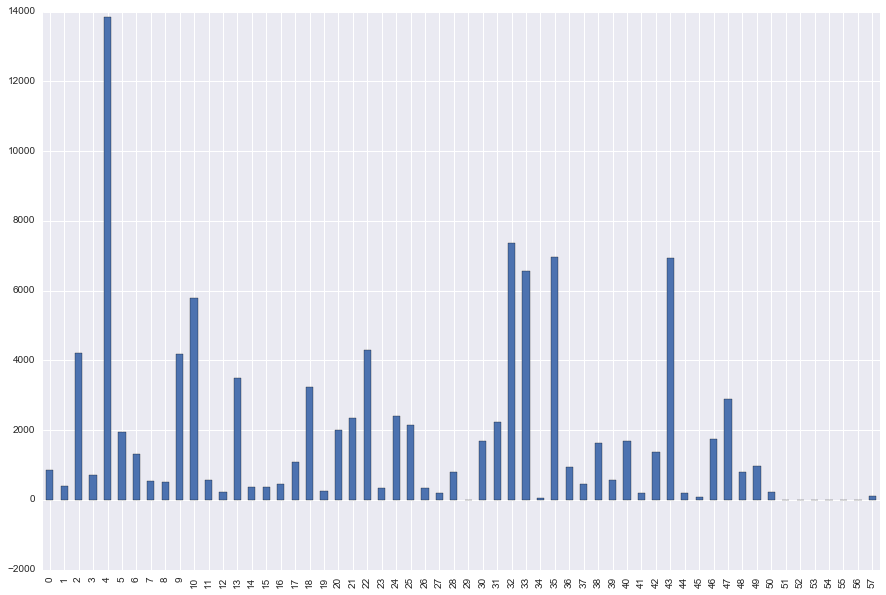

In [9]:
data["TOTD9"].plot(kind="bar", figsize=(15,10))
plt.xticks(rotation="vertical")

In [10]:
data.isnull().sum()

FIPST        0
SURVYEAR     0
STATENAME    0
TOTD9        0
AMD9M        0
AMD9F        0
AMD9         0
ASD9M        0
ASD9F        0
ASD9         0
HID9M        0
HID9F        0
HID9         0
BLD9M        0
BLD9F        0
BLD9         0
WHD9M        0
WHD9F        0
WHD9         0
HPD9M        0
HPD9F        0
HPD9         0
TRD9M        0
TRD9F        0
TRD9         0
TOTD10       0
AMD10M       0
AMD10F       0
AMD10        0
ASD10M       0
ASD10F       0
ASD10        0
HID10M       0
HID10F       0
HID10        0
BLD10M       0
BLD10F       0
BLD10        0
WHD10M       0
WHD10F       0
WHD10        0
HPD10M       0
HPD10F       0
HPD10        0
TRD10M       0
TRD10F       0
TRD10        0
TOTD11       0
AMD11M       0
AMD11F       0
AMD11        0
ASD11M       0
ASD11F       0
ASD11        0
HID11M       0
HID11F       0
HID11        0
BLD11M       0
BLD11F       0
BLD11        0
WHD11M       0
WHD11F       0
WHD11        0
HPD11M       0
HPD11F       0
HPD11        0
TRD11M    

# we donot have any null values in above datasets. but we do have zeros drop out rate

In [11]:
## Correlation between each variables with another
## but we are interested in correlation with target variable.
cor = data.corr()
cor.head()


,FIPST,TOTD9,AMD9M,AMD9F,AMD9,ASD9M,ASD9F,ASD9,HID9M,HID9F,HID9,BLD9M,BLD9F,BLD9,WHD9M,WHD9F,WHD9,HPD9M,HPD9F,HPD9,TRD9M,TRD9F,TRD9,TOTD10,AMD10M,AMD10F,AMD10,ASD10M,ASD10F,ASD10,HID10M,HID10F,HID10,BLD10M,BLD10F,BLD10,WHD10M,WHD10F,WHD10,HPD10M,HPD10F,HPD10,TRD10M,TRD10F,TRD10,TOTD11,AMD11M,AMD11F,AMD11,ASD11M,ASD11F,ASD11,HID11M,HID11F,HID11,BLD11M,BLD11F,BLD11,WHD11M,WHD11F,WHD11,HPD11M,HPD11F,HPD11,TRD11M,TRD11F,TRD11,TOTD12,AMD12M,AMD12F,AMD12,ASD12M,ASD12F,ASD12,HID12M,HID12F,HID12,BLD12M,BLD12F,BLD12,WHD12M,WHD12F,WHD12,HPD12M,HPD12F,HPD12,TRD12M,TRD12F,TRD12,AMDUGM,AMDUGF,ASDUGM,ASDUGF,HIDUGM,HIDUGF,BLDUGM,BLDUGF,WHDUGM,WHDUGF,HPDUGM,HPDUGF,TRDUGM,TRDUGF,TOTD912,TOTDAMM,TOTDAMF,TOTDAM,TOTDASM,TOTDASF,TOTDAS,TOTDHIM,TOTDHIF,TOTDHI,TOTDBLM,TOTDBLF,TOTDBL,TOTDWHM,TOTDWHF,TOTDWH,TOTDHPM,TOTDHPF,TOTDHP,TOTDTRM,TOTDTRF,TOTDTR,TOTDM,TOTDF,G9,G10,G11,G12,EBS912,EBSAM,EBSAS,EBSHI,EBSBL,EBSWH,EBSHP,EBSTR,DRP9,DRP10,DRP11,DRP12,DRP912,DRPAM,DRPAS,DRPHI,DRPBL,DRPWH,DRPHP,DRPTR,TOTDPL,AMDPLM,AMDPLF,AMDPL,ASDPLM,ASDPLF,ASDPL,HIDPLM,HIDPLF,HIDPL,BLDPLM,BLDPLF,BLDPL,WHDPLM,WHDPLF,WHDPL,HPDPLM,HPDPLF,HPDPL,TRDPLM,TRDPLF,TRDPL,DPLM,DPLF,AFGEB,AFGEBAM,AFGEBAS,AFGEBHI,AFGEBBL,AFGEBWH,AFGR,AFGRAM,AFGRAS,AFGRHI,AFGRBL,AFGRWH,TOTOHC,AMOHCM,AMOHCF,AMOHC,ASOHCM,ASOHCF,ASOHC,HIOHCM,HIOHCF,HIOHC,BLOHCM,BLOHCF,BLOHC,WHOHCM,WHOHCF,WHOHC,HPOHCM,HPOHCF,HPOHC,TROHCM,TROHCF,TROHC,RACECAT
FIPST,1.000000,-0.260126,-0.222931,-0.212277,-0.215048,-0.198259,-0.250669,-0.218177,-0.204440,-0.209632,-0.206612,-0.199317,-0.186736,-0.194900,-0.257321,-0.233802,-0.248363,-0.214364,-0.211076,-0.216207,-0.228816,-0.232043,-0.230921,-0.278348,-0.247572,-0.238489,-0.239597,-0.203347,-0.229421,-0.211556,-0.201303,-0.205112,-0.202643,-0.224016,-0.226750,-0.225272,-0.305507,-0.298068,-0.302597,-0.235188,-0.224627,-0.234234,-0.203648,-0.209476,-0.207115,-0.296246,-0.305931,-0.293671,-0.297096,-0.233875,-0.254242,-0.239435,-0.224247,-0.228548,-0.225915,-0.266223,-0.245527,-0.257215,-0.317546,-0.317529,-0.318027,-0.243205,-0.249980,-0.249081,-0.229132,-0.229466,-0.230047,-0.248574,-0.270809,-0.272418,-0.269614,-0.222069,-0.225169,-0.222044,-0.218378,-0.193070,-0.208470,-0.256942,-0.204675,-0.235349,-0.280755,-0.263621,-0.274646,-0.217613,-0.211736,-0.215524,-0.208901,-0.211263,-0.210062,-0.197200,-0.221180,-0.181185,-0.217818,-0.078709,-0.110639,-0.042923,-0.044664,-0.070422,-0.076572,0.008158,0.008158,-0.041732,-0.046957,-0.274367,-0.265905,-0.257788,-0.262123,-0.226987,-0.240450,-0.231487,-0.216876,-0.206363,-0.212398,-0.250271,-0.224662,-0.238792,-0.308164,-0.290085,-0.300974,-0.229590,-0.223204,-0.226392,-0.219088,-0.221729,-0.219444,-0.280421,-0.269245,-0.218557,-0.224223,-0.226865,-0.228013,-0.223087,-0.164927,-0.207254,-0.143667,-0.231700,-0.224076,-0.217664,-0.242557,-0.373229,-0.406235,-0.495861,-0.500768,-0.479890,-0.346469,-0.512262,-0.477068,-0.438215,-0.528434,-0.308181,0.105376,-0.215050,-0.125217,-0.145489,-0.137560,-0.201609,-0.204926,-0.207420,-0.132191,-0.131404,-0.135122,-0.211886,-0.218724,-0.225440,-0.188396,-0.197290,-0.211229,-0.213226,-0.211197,-0.212480,-0.235882,-0.242267,-0.239316,-0.215605,-0.221520,-0.223851,-0.158064,-0.210994,-0.136379,-0.232765,-0.230158,-0.441805,-0.465072,-0.545093,-0.465195,-0.470164,-0.433551,-0.127238,-0.153473,-0.184797,-0.168745,-0.128629,-0.160575,-0.142494,-0.132956,-0.147464,-0.141180,-0.141735,-0.200099,-0.169292,-0.024241,-0.055998,-0.036313,-0.043181,-0.171053,-0.188137,-0.155090,-0.154247,-0.164527,-0.186380
TOTD9,-0.260126,1.000000,0.313660,0.253808,0.288152,0.680079,0.665824,0.682795,0.843966,0.836370,0.841942,0.786640,0.829430,0.807482,0.846240,0.829645,0.844000,0.614820,0.616483,0.629704,0.657730,0.650664,0.657823,0.962959,0.309083,0.258961,0.284273,0.569974,0.563706,0.569070,0.820963,0.823351,0.822020,0.789906,0.786005,0.790332,0.861558,0.862940,0.864516,0.610513,0.591546,0.614729,0.613210,0.616629,0.618320,0.933595,0.311889,0.244326,0.277401,0.654300,0.642279,0.650189,0.775902,0.792245,0.783102,0.896521,0

In [12]:
pd.get_option("display.max_columns")

212

In [13]:
pd.set_option("display.max.rows", 210)

In [14]:
pd.set_option("display.max_columns", 212)

In [15]:
pd.get_option("display.max_columns")

212

In [16]:
pd.set_option('precision',7)

In [17]:
data.shape

(58, 212)

In [18]:
## so our problem has been solved, we have set maximum column disply option to 212 instead of default 20

* Lets count How many zeros in each column.

In [19]:
## How many zeros in All columns.
data[data==0].count()

FIPST         0
SURVYEAR      0
STATENAME     0
TOTD9         0
AMD9M        14
AMD9F        10
AMD9          8
ASD9M         9
ASD9F        13
ASD9          7
HID9M         5
HID9F         4
HID9          3
BLD9M         3
BLD9F         6
BLD9          3
WHD9M         1
WHD9F         2
WHD9          1
HPD9M         9
HPD9F        10
HPD9          9
TRD9M         4
TRD9F         5
TRD9          4
TOTD10        0
AMD10M        8
AMD10F        8
AMD10         5
ASD10M        8
ASD10F       14
ASD10         6
HID10M        1
HID10F        4
HID10         1
BLD10M        2
BLD10F        3
BLD10         1
WHD10M        2
WHD10F        2
WHD10         1
HPD10M       10
HPD10F        9
HPD10         8
TRD10M        3
TRD10F        2
TRD10         2
TOTD11        0
AMD11M        9
AMD11F        6
AMD11         5
ASD11M        5
ASD11F        7
ASD11         5
HID11M        2
HID11F        2
HID11         2
BLD11M        1
BLD11F        2
BLD11         0
WHD11M        1
WHD11F        2
WHD11   

In [20]:
## in total we had 595 cells with zero value.
datawithzero = data[data == 0]
datawithzero.count().sum()

595

In [21]:
# In next cell, We will see the Correlation of "TOTD9" with another columns.
# With the help of correlation we can select the imortant columns. which can affect our dependent variable.

                                    ## Correlation with target Variable.

In [22]:
data.corr()["TOTD9"]

FIPST     -0.2601258
TOTD9      1.0000000
AMD9M      0.3136598
AMD9F      0.2538082
AMD9       0.2881523
ASD9M      0.6800786
ASD9F      0.6658244
ASD9       0.6827954
HID9M      0.8439663
HID9F      0.8363705
HID9       0.8419418
BLD9M      0.7866404
BLD9F      0.8294303
BLD9       0.8074824
WHD9M      0.8462405
WHD9F      0.8296450
WHD9       0.8440001
HPD9M      0.6148204
HPD9F      0.6164828
HPD9       0.6297044
TRD9M      0.6577297
TRD9F      0.6506639
TRD9       0.6578226
TOTD10     0.9629593
AMD10M     0.3090834
AMD10F     0.2589612
AMD10      0.2842730
ASD10M     0.5699742
ASD10F     0.5637064
ASD10      0.5690696
HID10M     0.8209628
HID10F     0.8233511
HID10      0.8220205
BLD10M     0.7899060
BLD10F     0.7860052
BLD10      0.7903322
WHD10M     0.8615577
WHD10F     0.8629403
WHD10      0.8645160
HPD10M     0.6105129
HPD10F     0.5915460
HPD10      0.6147290
TRD10M     0.6132104
TRD10F     0.6166295
TRD10      0.6183199
TOTD11     0.9335949
AMD11M     0.3118892
AMD11F     0.

* In our data, we have to predict the TOTD9 drouput rate for the 9th grade.
* AMD9M and AMD9F = AMD9
* e.g AMD9(0.28) = AMD9M(0.31)+AMD9F(0.25) Male count + Female Count = Total count we will drop male and Female column and only select Total column.
* if we compared the correlation of male and female for each column which is equal to total correlation of resepective column.so we will only consider total instead of Male and female
* in our case we dont need male and female in seperate column. we only concern about the dropout.
* we are not going to find out drop rate with gender based or raced based so we will only consider total count column 

In [23]:
corrgreat60= data.corr()["TOTD9"] > 0.60

In [24]:
corrgreat60.value_counts()

True     128
False     82
Name: TOTD9, dtype: int64

## We have 128 columns which has correlation values greater than 0.60
## 82 columns which has correlation values less than 0.60

In [25]:
corrgreat60= data.corr()["TOTD9"] > 0.50
corrgreat60.value_counts()

True     138
False     72
Name: TOTD9, dtype: int64

* Total we have 138 columns with more than 0.50 correlation value

In [26]:
## above 0.50 correlation, we had total 138 columns.
## so than means 10 columns in between 0.50 and 0.60 correlations(138-128)

In [27]:
## Feature Engineering:
## On basis of corraltion with TOTD9 and number of zeros present in male and female column.
## I have decided to drop the Male and female column. we will only select total column for each catagory
## instead of Male and Female.
## so I assume we can reduced the number of zeros in summation column.
## e.g MALE+FEMale = Total 



* I have only select the column which will be related to 9th grade and only total(Deleted Male and female)
* Column selected 9th grade and also included 9-12 grade dropouts.
* Deleted all 10th, 11th, 12th Grade dropouts and respected columns.
* I have formatted and load another CSV file(college_dropout_raw2 .csv) 

# Second Input file after deleting Male and female columns. only consider total columns of each catagory.

In [28]:
new_data = pd.read_csv("college_dropout_raw2 .csv")
new_data.head()

,FIPST,STATENAME,TOTD9,AMD9,ASD9,HID9,BLD9,WHD9,HPD9,TRD9,TOTD912,TOTDAMM,TOTDAMF,TOTDAM,TOTDASM,TOTDASF,TOTDAS,TOTDHIM,TOTDHIF,TOTDHI,TOTDBLM,TOTDBLF,TOTDBL,TOTDWHM,TOTDWHF,TOTDWH,TOTDHPM,TOTDHPF,TOTDHP,TOTDTRM,TOTDTRF,TOTDTR,TOTDM,TOTDF,G9,EBS912,EBSAM,EBSAS,EBSHI,EBSBL,EBSWH,EBSHP,EBSTR,DRP9,DRP912,DRPAM,DRPAS,DRPHI,DRPBL,DRPWH,DRPHP,DRPTR
0,1,Alabama,864,7,6,24,398,420,-2,-2,3902,14,11,27,20,17,37,26,33,59,945,665,1610,1207,888,2095,-2,-2,-2,-2,-2,-2,2212,1614,63338,219495,2079,2685,6357,79631,128361,-2,-2,1.3999996,1.7999992,1.2999992,1.3999996,0.8999996,2.0000000,1.5999994,-2.0000000,-2.0000000
1,2,Alaska,404,207,9,12,8,141,6,21,2820,572,512,1084,52,41,91,72,62,134,62,36,98,642,497,1139,42,31,70,110,89,200,1552,1268,10112,40837,9319,2581,2190,1540,22371,760,2076,4.0000000,6.8999977,11.5999985,3.5000000,6.0999985,6.3999977,5.0999985,9.1999969,9.5999985
2,4,Arizona,4207,552,90,1730,302,1533,-2,-2,24865,1415,1331,2746,234,241,475,5667,4322,9989,987,727,1714,5344,4597,9941,-2,-2,-2,-2,-2,-2,13647,11218,82461,317447,18753,9704,123757,19542,145693,-2,-2,5.0999985,7.7999992,14.5999985,4.8999977,8.0999985,8.7999954,6.7999992,-2.0000000,-2.0000000
3,5,Arkansas,720,8,4,84,267,347,0,10,4892,25,18,45,17,13,27,256,170,426,944,564,1510,1650,1167,2817,12,11,24,21,20,40,2925,1963,37556,136347,924,1982,10494,30312,90828,537,1270,1.8999996,3.5999985,4.8999977,1.3999996,4.0999985,5.0000000,3.0999985,4.5000000,3.0999985
4,6,California,13849,161,503,8502,2034,2070,93,486,92874,609,423,1035,2500,1689,4208,32348,22707,55187,7375,5243,12660,9863,6479,16436,344,295,639,1578,1126,2709,54617,37962,524681,1999096,16016,228496,958256,149894,579649,12724,54063,2.5999985,4.5999985,6.5000000,1.7999992,5.7999992,8.3999939,2.7999992,5.0000000,5.0000000


* Now we have 52 columns and 58 rows for each state

In [29]:
new_data.shape

(58, 52)

In [30]:
## Now we have 58 rows and 52 columns in our input file.
## lets see the correlation between TOTD9 with another variable.
new_data.corr()["TOTD9"]

FIPST     -0.2601258
TOTD9      1.0000000
AMD9       0.2881523
ASD9       0.6827954
HID9       0.8419418
BLD9       0.8074824
WHD9       0.8440001
HPD9       0.6297044
TRD9       0.6578226
TOTD912    0.9416556
TOTDAMM    0.3435586
TOTDAMF    0.2774722
TOTDAM     0.3131250
TOTDASM    0.7015487
TOTDASF    0.6876503
TOTDAS     0.6971530
TOTDHIM    0.7888418
TOTDHIF    0.7948971
TOTDHI     0.7924466
TOTDBLM    0.9012749
TOTDBLF    0.8988984
TOTDBL     0.8988186
TOTDWHM    0.8956924
TOTDWHF    0.8721797
TOTDWH     0.8895454
TOTDHPM    0.6239234
TOTDHPF    0.6232959
TOTDHP     0.6257338
TOTDTRM    0.6403183
TOTDTRF    0.6345951
TOTDTR     0.6379014
TOTDM      0.9351133
TOTDF      0.9422171
G9         0.9019402
EBS912     0.8969354
EBSAM      0.3251733
EBSAS      0.7785180
EBSHI      0.7698005
EBSBL      0.7879315
EBSWH      0.8036048
EBSHP      0.6319525
EBSTR      0.6532298
DRP9       0.2936096
DRP912     0.2753385
DRPAM      0.1375833
DRPAS      0.1327657
DRPHI      0.2931194
DRPBL      0.

* Total we have 36 Columns with more than 0.50 correlation

In [31]:
## Total we have 36 Columns with more than 0.50 correlation
data_corr= new_data.corr()["TOTD9"] > 0.50
data_corr.value_counts()

True     36
False    15
Name: TOTD9, dtype: int64

In [32]:
## Total we have 36 Columns with more than 0.60 correlation
data_corr= new_data.corr()["TOTD9"] > 0.60
data_corr.value_counts()

True     36
False    15
Name: TOTD9, dtype: int64

In [33]:
## 15 Columns which is less than 0.40 Correlation.
data_corr= new_data.corr()["TOTD9"] < 0.40
data_corr.value_counts()


False    36
True     15
Name: TOTD9, dtype: int64

## Below Columns, correlation values are less than 0.40
# FIPST,AMD9,TOTDAMF,TOTDAMM,TOTDAM,DRP9,DRP912,DRPAM,DRPAS,DRPHI,DRPBL,DRPWH,DRPHP,DRPTR
* So in below file ("college_dropout_raw3.csv"), we have deleted above columns which has less than 0.40 correlation value


In [34]:
new_data2= pd.read_csv("college_dropout_raw3.csv")
new_data2.head()

,TOTD9,ASD9,HID9,BLD9,WHD9,HPD9,TRD9,TOTD912,TOTDASM,TOTDASF,TOTDAS,TOTDHIM,TOTDHIF,TOTDHI,TOTDBLM,TOTDBLF,TOTDBL,TOTDWHM,TOTDWHF,TOTDWH,TOTDHPM,TOTDHPF,TOTDHP,TOTDTRM,TOTDTRF,TOTDTR,TOTDM,TOTDF,G9,EBS912,EBSAS,EBSHI,EBSBL,EBSWH,EBSHP,EBSTR
0,864,6,24,398,420,-2,-2,3902,20,17,37,26,33,59,945,665,1610,1207,888,2095,-2,-2,-2,-2,-2,-2,2212,1614,63338,219495,2685,6357,79631,128361,-2,-2
1,404,9,12,8,141,6,21,2820,52,41,91,72,62,134,62,36,98,642,497,1139,42,31,70,110,89,200,1552,1268,10112,40837,2581,2190,1540,22371,760,2076
2,4207,90,1730,302,1533,-2,-2,24865,234,241,475,5667,4322,9989,987,727,1714,5344,4597,9941,-2,-2,-2,-2,-2,-2,13647,11218,82461,317447,9704,123757,19542,145693,-2,-2
3,720,4,84,267,347,0,10,4892,17,13,27,256,170,426,944,564,1510,1650,1167,2817,12,11,24,21,20,40,2925,1963,37556,136347,1982,10494,30312,90828,537,1270
4,13849,503,8502,2034,2070,93,486,92874,2500,1689,4208,32348,22707,55187,7375,5243,12660,9863,6479,16436,344,295,639,1578,1126,2709,54617,37962,524681,1999096,228496,958256,149894,579649,12724,54063


* we have reduced our cols size from 52 to 36 by dropping above cols.

In [35]:
## Now we have 58 rows which is same and 36 columns.
new_data2.shape


(58, 36)

In [36]:
## Lets see the correlation with target variable.
new_data2.corr()["TOTD9"]

TOTD9      1.0000000
ASD9       0.6827954
HID9       0.8419418
BLD9       0.8074824
WHD9       0.8440001
HPD9       0.6297044
TRD9       0.6578226
TOTD912    0.9416556
TOTDASM    0.7015487
TOTDASF    0.6876503
TOTDAS     0.6971530
TOTDHIM    0.7888418
TOTDHIF    0.7948971
TOTDHI     0.7924466
TOTDBLM    0.9012749
TOTDBLF    0.8988984
TOTDBL     0.8988186
TOTDWHM    0.8956924
TOTDWHF    0.8721797
TOTDWH     0.8895454
TOTDHPM    0.6239234
TOTDHPF    0.6232959
TOTDHP     0.6257338
TOTDTRM    0.6403183
TOTDTRF    0.6345951
TOTDTR     0.6379014
TOTDM      0.9351133
TOTDF      0.9422171
G9         0.9019402
EBS912     0.8969354
EBSAS      0.7785180
EBSHI      0.7698005
EBSBL      0.7879315
EBSWH      0.8036048
EBSHP      0.6319525
EBSTR      0.6532298
Name: TOTD9, dtype: float64

* In below cell, we are filter out  some columns on basis of correlation values

In [37]:
new_corr = new_data2.corr()["TOTD9"] > 0.60
new_corr.value_counts()


True    36
Name: TOTD9, dtype: int64

*Conclusion- Now we only have 36 columns with more than 0.60 correlation value.
*so we have reduced our column length from 212 to 36 and now we are going to perform regression on these columns.

## All 36 variables plot against the correlation values.(All column values are greater than 0.60)

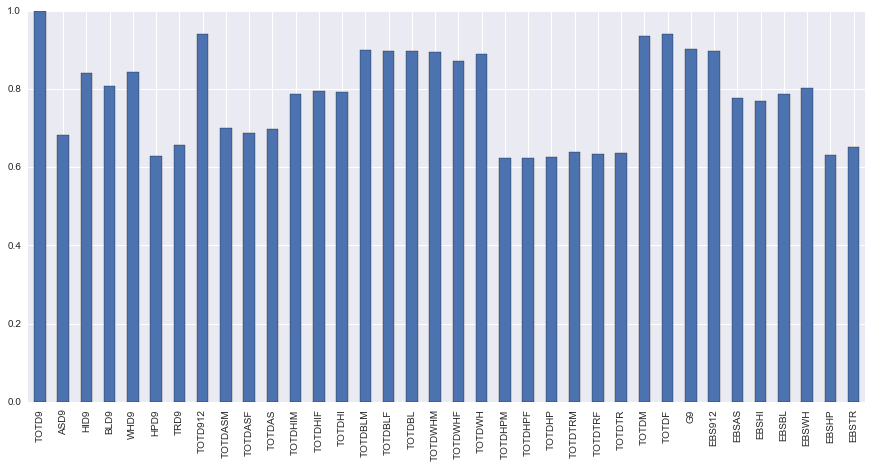

In [38]:
new_data2.corr()["TOTD9"].plot(kind="bar", figsize=(15,7))

# Clearly, we can see all the correlation values are greater than 0.6 

## Now we have cols, we will start Multiple regreesion 

Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
$y$ is the response
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)
$\beta_n$ is the coefficient for $x_n$ (the nth feature)
The $\beta$ values are called the model coefficients:
These values are estimated (or "learned") during the model fitting process using the least squares criterion.
Specifically, we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors").
And once we've learned these coefficients, we can use the model to predict the response.

In [39]:
# In this cell, we are going to look at the how may zeros present in each column.
new_data = new_data2[new_data2 == 0]

* Zeros will not affect on our output. However, We dont have any NAN values or Null values in all columns.

# 35 Independent columns, we are going to process for Multiple Regression.
# X = 35 columns 
# y = TOTD9 Drop out rate.

In [40]:
## Independent Variable also feature cols. we totally have 35 indenpdent cols and one Y 
Feat_cols = ["ASD9","HID9","BLD9","WHD9","HPD9","TRD9","TOTDASM","TOTDASF","TOTDAS","TOTDHIM","TOTDHIF","TOTDHI",
    "TOTDBLM","TOTDBLF","TOTDBLF","TOTDBL","TOTDWHM","TOTDWHF","TOTDWH","TOTDHPM","TOTDHPF","TOTDHP","TOTDTRM",
    "TOTDTRF","TOTDTR","TOTDM","TOTDF","G9","EBS912","EBSAS","EBSHI","EBSBL","EBSWH","EBSHP","EBSTR"]
X = new_data2[Feat_cols]
X.head()



,ASD9,HID9,BLD9,WHD9,HPD9,TRD9,TOTDASM,TOTDASF,TOTDAS,TOTDHIM,TOTDHIF,TOTDHI,TOTDBLM,TOTDBLF,TOTDBLF,TOTDBL,TOTDWHM,TOTDWHF,TOTDWH,TOTDHPM,TOTDHPF,TOTDHP,TOTDTRM,TOTDTRF,TOTDTR,TOTDM,TOTDF,G9,EBS912,EBSAS,EBSHI,EBSBL,EBSWH,EBSHP,EBSTR
0,6,24,398,420,-2,-2,20,17,37,26,33,59,945,665,665,1610,1207,888,2095,-2,-2,-2,-2,-2,-2,2212,1614,63338,219495,2685,6357,79631,128361,-2,-2
1,9,12,8,141,6,21,52,41,91,72,62,134,62,36,36,98,642,497,1139,42,31,70,110,89,200,1552,1268,10112,40837,2581,2190,1540,22371,760,2076
2,90,1730,302,1533,-2,-2,234,241,475,5667,4322,9989,987,727,727,1714,5344,4597,9941,-2,-2,-2,-2,-2,-2,13647,11218,82461,317447,9704,123757,19542,145693,-2,-2
3,4,84,267,347,0,10,17,13,27,256,170,426,944,564,564,1510,1650,1167,2817,12,11,24,21,20,40,2925,1963,37556,136347,1982,10494,30312,90828,537,1270
4,503,8502,2034,2070,93,486,2500,1689,4208,32348,22707,55187,7375,5243,5243,12660,9863,6479,16436,344,295,639,1578,1126,2709,54617,37962,524681,1999096,228496,958256,149894,579649,12724,54063


# y = Target Variable TOTD9

In [41]:
## Dependent Cols or target variable.
target = ["TOTD9"]
y = new_data2[target]
y.head()

,TOTD9
0,864
1,404
2,4207
3,720
4,13849



## Values Zero in cols that means zero dropout rate.
## we dont have any missing values in all columns.

In [42]:
new_data2.head()

,TOTD9,ASD9,HID9,BLD9,WHD9,HPD9,TRD9,TOTD912,TOTDASM,TOTDASF,TOTDAS,TOTDHIM,TOTDHIF,TOTDHI,TOTDBLM,TOTDBLF,TOTDBL,TOTDWHM,TOTDWHF,TOTDWH,TOTDHPM,TOTDHPF,TOTDHP,TOTDTRM,TOTDTRF,TOTDTR,TOTDM,TOTDF,G9,EBS912,EBSAS,EBSHI,EBSBL,EBSWH,EBSHP,EBSTR
0,864,6,24,398,420,-2,-2,3902,20,17,37,26,33,59,945,665,1610,1207,888,2095,-2,-2,-2,-2,-2,-2,2212,1614,63338,219495,2685,6357,79631,128361,-2,-2
1,404,9,12,8,141,6,21,2820,52,41,91,72,62,134,62,36,98,642,497,1139,42,31,70,110,89,200,1552,1268,10112,40837,2581,2190,1540,22371,760,2076
2,4207,90,1730,302,1533,-2,-2,24865,234,241,475,5667,4322,9989,987,727,1714,5344,4597,9941,-2,-2,-2,-2,-2,-2,13647,11218,82461,317447,9704,123757,19542,145693,-2,-2
3,720,4,84,267,347,0,10,4892,17,13,27,256,170,426,944,564,1510,1650,1167,2817,12,11,24,21,20,40,2925,1963,37556,136347,1982,10494,30312,90828,537,1270
4,13849,503,8502,2034,2070,93,486,92874,2500,1689,4208,32348,22707,55187,7375,5243,12660,9863,6479,16436,344,295,639,1578,1126,2709,54617,37962,524681,1999096,228496,958256,149894,579649,12724,54063


## Vizualization for all X variables with target variable 
## Trying to find out the linear relationship with y 
## In each matrix we can see the linear relationship with TOTD9

#                                Scatter Plot to determine the Linear Relationship 

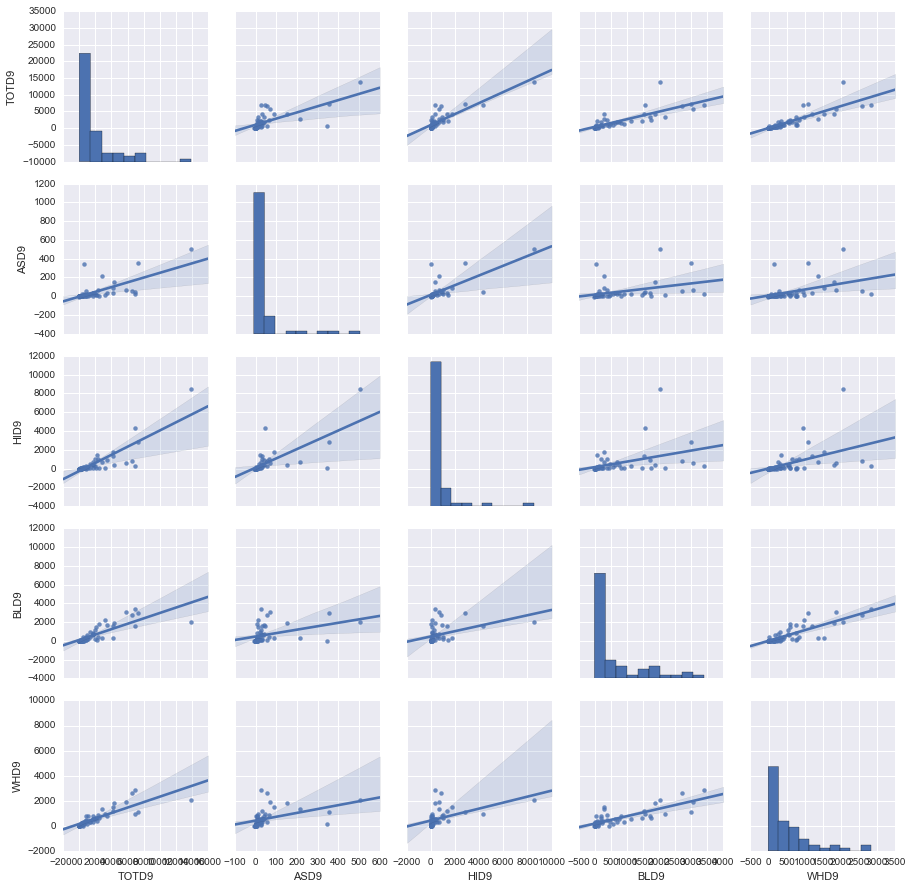

In [43]:
## By using Vizulization you can see the relationship between each variables.
sns.pairplot(new_data2, vars=["TOTD9","ASD9","HID9","BLD9","WHD9"],kind = "reg")

* In above cell, we can see the linear relation ship with each other .
* Now we have two parameters where we can find the relationship in between independent variables.
* correlation values in between variables
* Scatter plot in between variables.
* on basis of correlation and  regression plot we can find out or filter out the columns


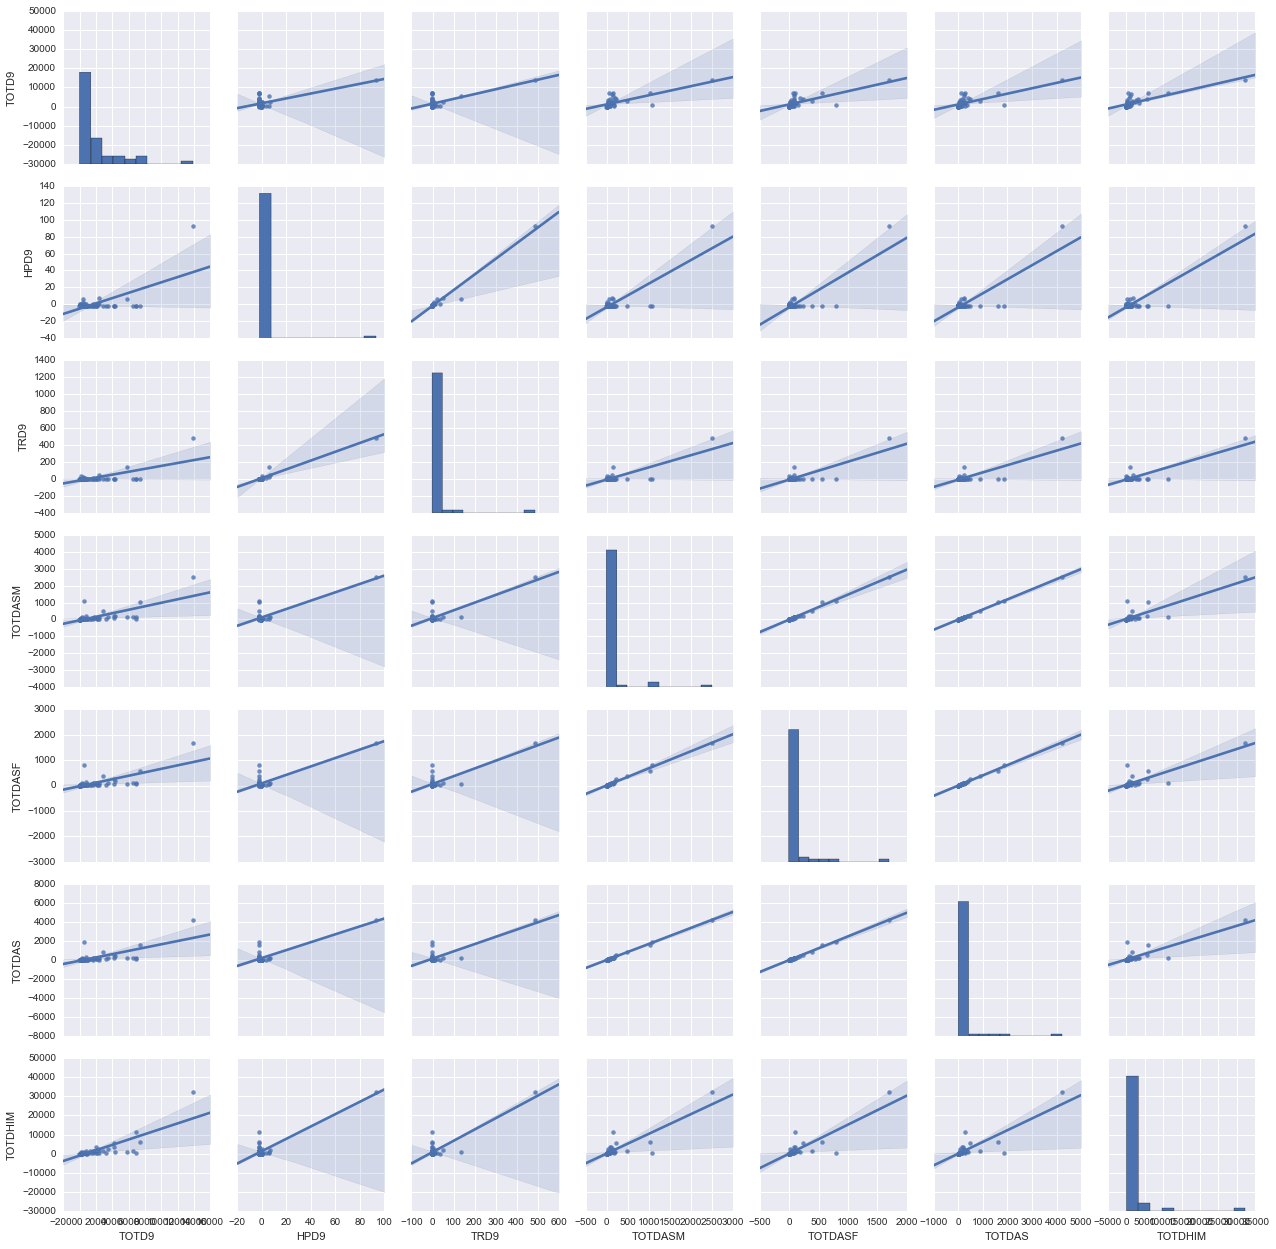

In [44]:
sns.pairplot(new_data2, vars=["TOTD9","HPD9","TRD9","TOTDASM","TOTDASF","TOTDAS","TOTDHIM"],kind = "reg")

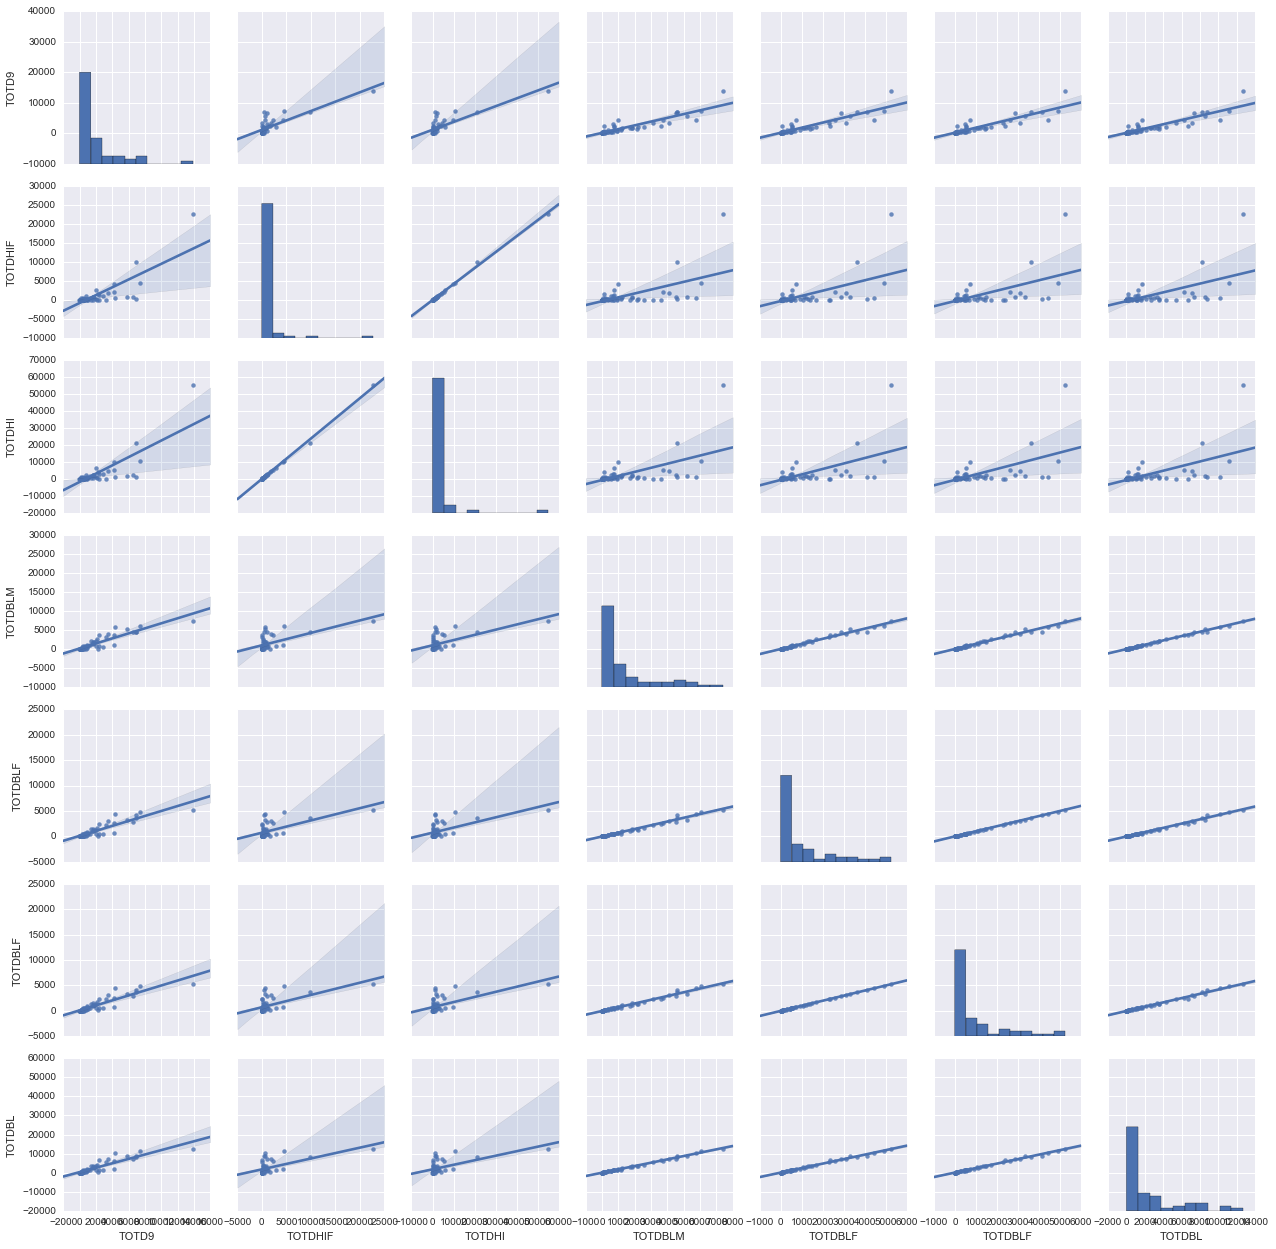

In [45]:
sns.pairplot(new_data2, vars=["TOTD9","TOTDHIF","TOTDHI","TOTDBLM","TOTDBLF","TOTDBLF","TOTDBL"],kind = "reg")

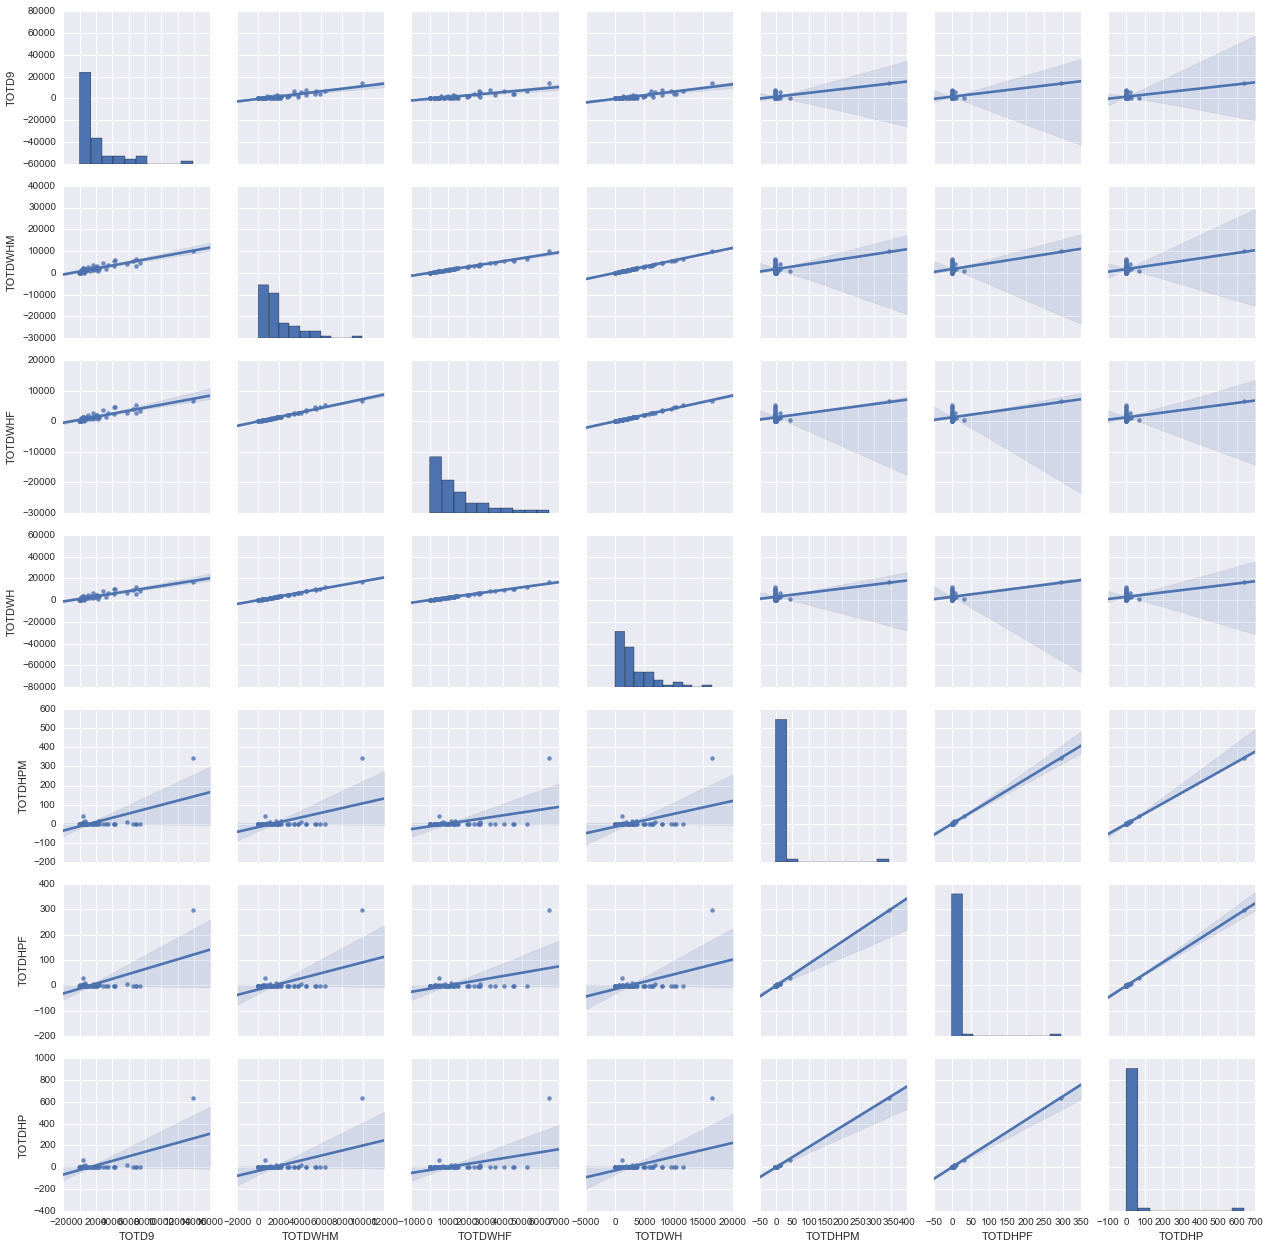

In [46]:
sns.pairplot(new_data2, vars=["TOTD9","TOTDWHM","TOTDWHF","TOTDWH","TOTDHPM","TOTDHPF","TOTDHP"],kind = "reg")

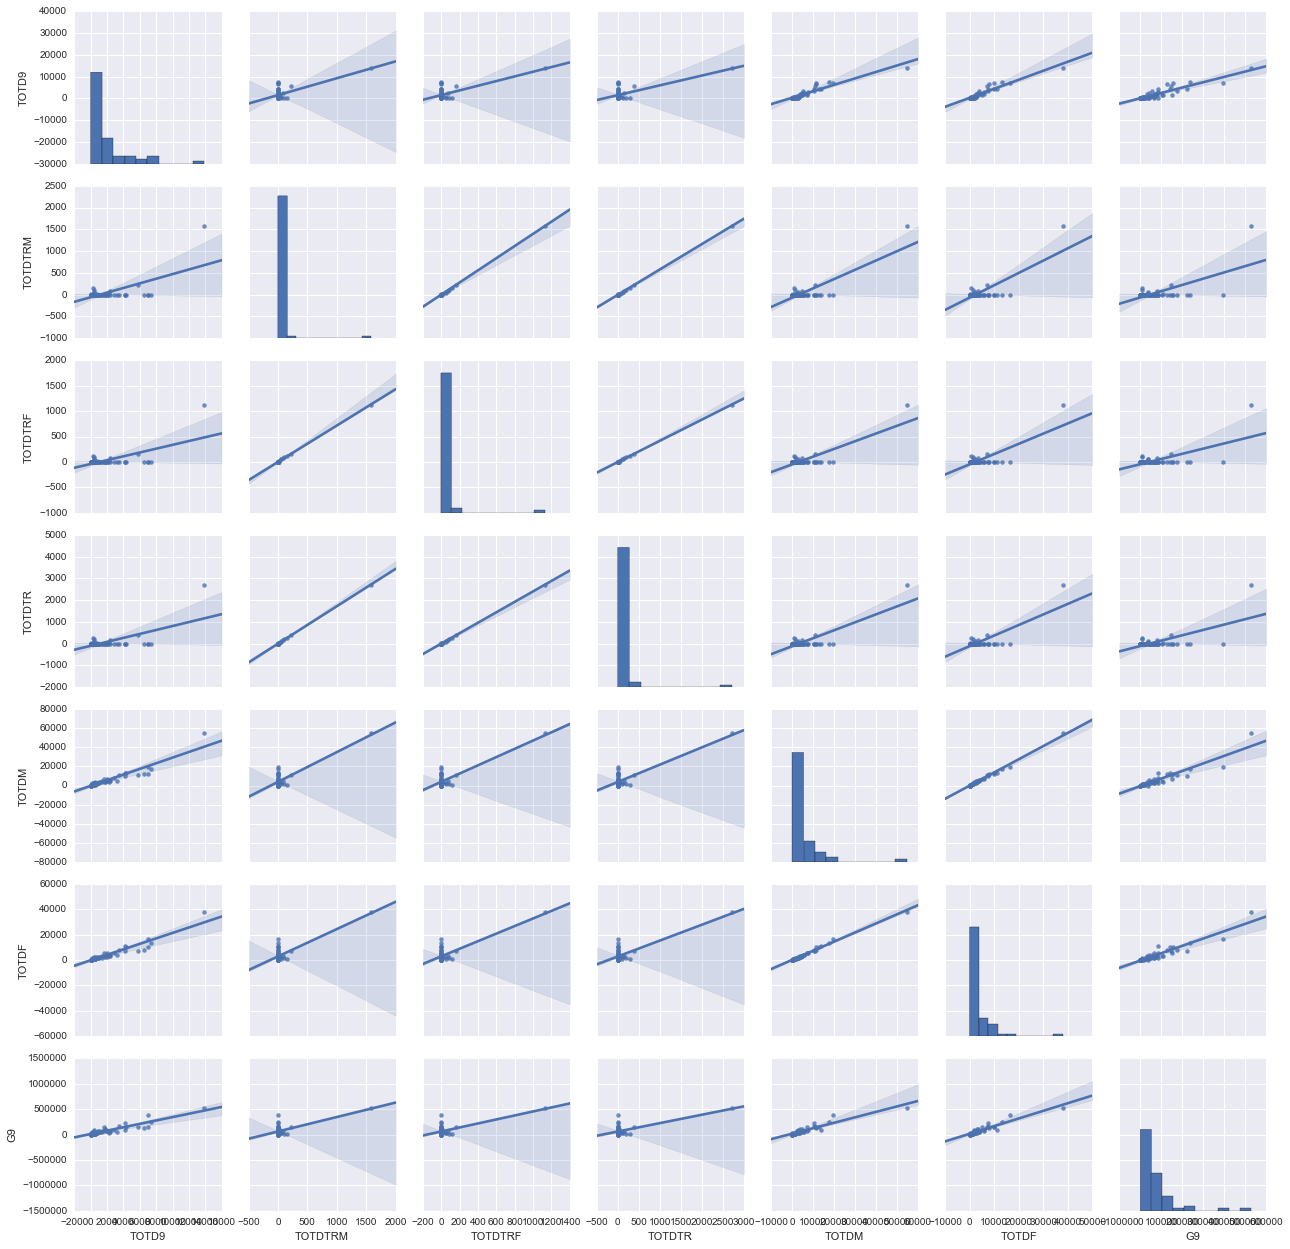

In [47]:
sns.pairplot(new_data2, vars=["TOTD9","TOTDTRM","TOTDTRF","TOTDTR","TOTDM","TOTDF","G9"],kind = "reg")

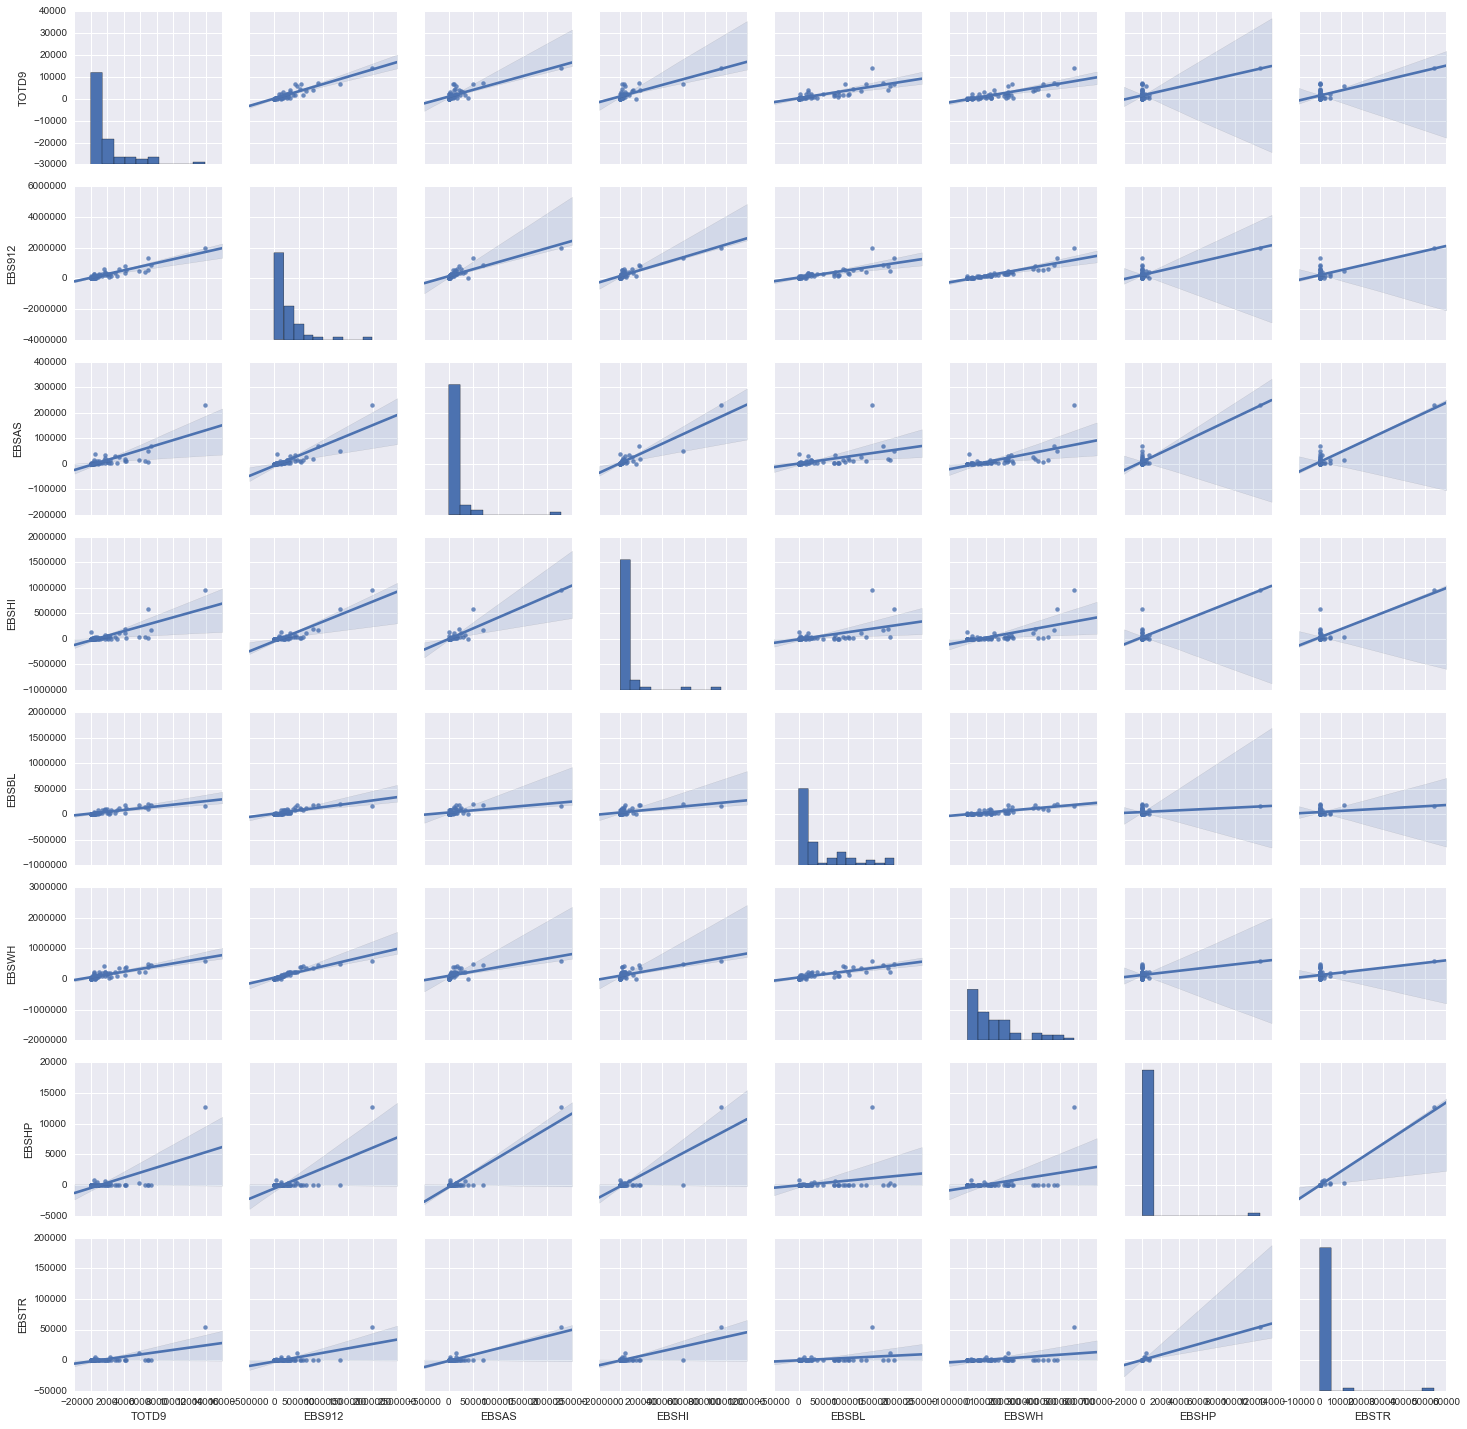

In [48]:
sns.pairplot(new_data2, vars=["TOTD9","EBS912","EBSAS","EBSHI","EBSBL","EBSWH","EBSHP","EBSTR"],kind = "reg")

## All 35 cols have more or less linear relationship with drop out rate.

## Now question is How we are going to Eliminate some cols or find out which cols has more siginificance on output.

## Now we have to see the P values for each cols. then only we can see the relationship with cols 
## On basis of P values, we will check the significance of each cols.


In [49]:
## We have defined Feature cols and target col so Now we will load linear regression library and See the result.
from sklearn.linear_model import LinearRegression

* We are trying to load the Linear regression module 
* Fitting the Module with X and y
* Going to Predict the y on basis of fitting module

In [50]:
Multi_reg = LinearRegression()

In [51]:
## fitting Module with X and y
Multi_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## coefficients Values.

In [52]:
# print the coefficients
Multi_reg.coef_

array([[  4.92748561e-01,   1.30717319e+00,   1.00605454e+00,
          1.02080145e+00,  -3.87523744e+00,  -2.01782100e+00,
         -2.08648107e+00,  -6.38827483e-01,   1.24423261e+00,
          6.47696905e-02,   6.19849715e-01,  -6.12260129e-01,
         -8.75501603e-01,   2.25405792e-02,   2.25405801e-02,
          2.37192523e-01,  -1.50311949e-01,   6.59913693e-01,
         -4.23390984e-01,  -9.46215092e+00,  -2.77786822e+00,
          6.12010542e+00,   3.80914778e+00,  -2.04478203e+00,
         -8.25873214e-01,   5.36828828e-01,  -1.55367814e-01,
          3.90407507e-03,  -1.82583428e-03,   4.39775087e-03,
          7.31426026e-04,   5.15575945e-04,   6.70038372e-04,
          7.64566497e-03,   6.63994657e-03]])

# Regression Intercept.

In [53]:
Multi_reg.intercept_

array([-24.54302243])

*R2 = 99.99
*That means, 100 percent variability in total drop out rate explained by all x variables.

In [54]:
R_square = Multi_reg.score(X,y)
print(R_square)


0.999936674377


# Prediction values of total dropout rate 

In [55]:
## Values of Prediction for Dropout rate 
pd.set_option('precision',4)
y_Predict = Multi_reg.predict(X)
print(y_Predict)
len(y_Predict)


[[  8.69334386e+02]
 [  4.07470801e+02]
 [  4.21407550e+03]
 [  7.04534320e+02]
 [  1.38490406e+04]
 [  1.92819118e+03]
 [  1.32687020e+03]
 [  5.59145884e+02]
 [  5.14515266e+02]
 [  4.20216141e+03]
 [  5.79886591e+03]
 [  5.67991052e+02]
 [  2.18796854e+02]
 [  3.45868102e+03]
 [  3.35416367e+02]
 [  3.74672289e+02]
 [  4.31431009e+02]
 [  1.13683713e+03]
 [  3.27662796e+03]
 [  2.81137685e+02]
 [  2.01024895e+03]
 [  2.36414971e+03]
 [  4.31119940e+03]
 [  3.42768325e+02]
 [  2.39828107e+03]
 [  2.15623941e+03]
 [  3.13632193e+02]
 [  1.93654109e+02]
 [  7.76490365e+02]
 [ -1.00789619e+01]
 [  1.70142266e+03]
 [  2.23347044e+03]
 [  7.35238198e+03]
 [  6.51259837e+03]
 [  4.66053387e+01]
 [  6.95249177e+03]
 [  9.69048309e+02]
 [  4.85136014e+02]
 [  1.63560219e+03]
 [  5.87879910e+02]
 [  1.70501124e+03]
 [  1.26012361e+02]
 [  1.35819842e+03]
 [  6.95295624e+03]
 [  2.03775937e+02]
 [  7.28009141e+01]
 [  1.72356703e+03]
 [  2.87213728e+03]
 [  8.41202820e+02]
 [  9.98039510e+02]


58

In [56]:
## Comapre y prediction values and actual y values)
import numpy as np
from sklearn import metrics

print("MSE", metrics.mean_squared_error(y,y_Predict))

MSE 399.746141244


# Intercept and Coeff values for each column.

In [57]:
import statsmodels.formula.api as smf
lm = smf.ols(formula= "TOTD9~ASD9+HID9+BLD9+WHD9+HPD9+TRD9+TOTDASM+TOTDASF+TOTDAS+TOTDHIM+TOTDHIF+TOTDHI+TOTDBLM+TOTDBLF+TOTDBLF+TOTDBL+TOTDWHM+TOTDWHF+TOTDWH+TOTDHPM+TOTDHPF+TOTDHP+TOTDTRM+TOTDTRF+TOTDTR+TOTDM+TOTDF+G9+EBS912+EBSAS+EBSHI+EBSBL+EBSWH+EBSHP+EBSTR", data=new_data2).fit()
lm.params


Intercept   -24.5430
ASD9          0.4927
HID9          1.3072
BLD9          1.0061
WHD9          1.0208
HPD9         -3.8752
TRD9         -2.0178
TOTDASM      -2.0865
TOTDASF      -0.6388
TOTDAS        1.2442
TOTDHIM       0.0648
TOTDHIF       0.6198
TOTDHI       -0.6123
TOTDBLM      -0.8755
TOTDBLF       0.0451
TOTDBL        0.2372
TOTDWHM      -0.1503
TOTDWHF       0.6599
TOTDWH       -0.4234
TOTDHPM      -9.4622
TOTDHPF      -2.7779
TOTDHP        6.1201
TOTDTRM       3.8091
TOTDTRF      -2.0448
TOTDTR       -0.8259
TOTDM         0.5368
TOTDF        -0.1554
G9            0.0039
EBS912       -0.0018
EBSAS         0.0044
EBSHI         0.0007
EBSBL         0.0005
EBSWH         0.0007
EBSHP         0.0076
EBSTR         0.0066
dtype: float64

## In this Cell, we are going to check about the R2 and F test P values 
* 100 percent variability in total drop out rate explained by all the x cols.
* F test P < 0.005 siginificant then theres is relationship between X and y
* lets check for P values for each cols.

In [58]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOTD9   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           1.05e-41
Time:                        13:38:22   Log-Likelihood:                -256.03
No. Observations:                  58   AIC:                             582.1
Df Residuals:                      23   BIC:                             654.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -24.5430     17.430     -1.408      0.1

* Now we can see the adj R2 which is 100 percent but I think If we add more feature columns then our R2 will increase automatically, so R2 is not right parameter to validate our module.

## We only have three cols "HID9","BLD9","WHD9 < 0.05 P values
## All other cols, our P values are > 0.05 

In [59]:
## P values 
## If our P values < 0.05
## then we will reject NUll hypothesis that means there is linear relation ship between respective variable and TOTD9

# Lets see the relation ship between TOTD9 with other three cols(which has P values <0.05)

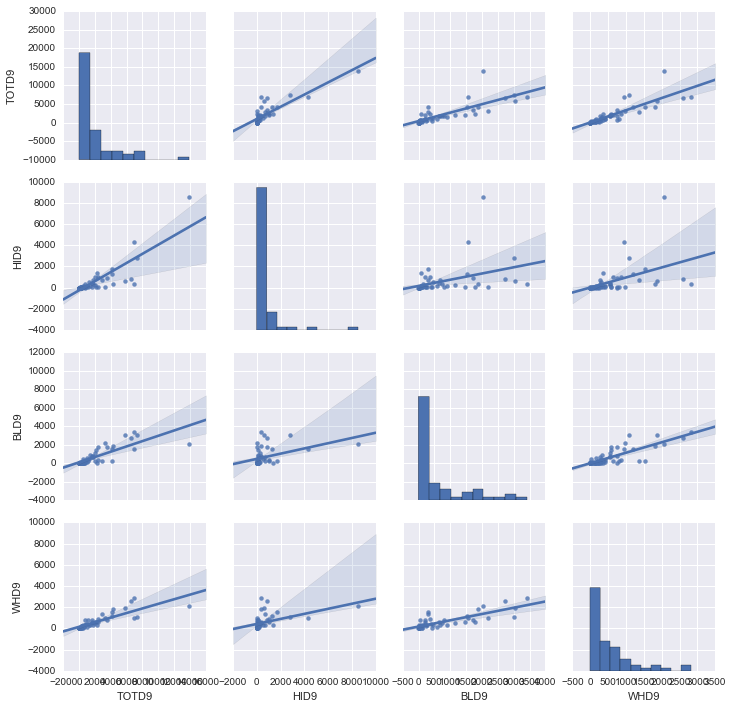

In [60]:
## Lets see the relationship of following columns with target variable.
sns.pairplot(new_data2, vars=["TOTD9","HID9","BLD9","WHD9"],kind="reg")

* In above chart, we can see the linear relationship between HID9+BLD9+WHD9 with TOTD9

* let's select columns which has P values < 0.05
* Column Names : HID9 and BLD9, WHD9  all these three columns have correlation more than 80 percent with target variable.

In [61]:
import statsmodels.formula.api as smf
lm = smf.ols(formula= "TOTD9~HID9+BLD9+WHD9", data=new_data2).fit()
lm.params

Intercept    6.7186
HID9         1.0974
BLD9         0.9102
WHD9         1.2215
dtype: float64

* If we add one more unit in HID9 then our drop out rate will increase by 1.09 unit
* If we add one more unit in BLD9 then our drop out rate will increase by 0.91 unit
* If we add one more unit in WHD9 then our drop out rate will increase by 1.22 unit

In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOTD9   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           1.33e-74
Time:                        13:38:27   Log-Likelihood:                -351.76
No. Observations:                  58   AIC:                             711.5
Df Residuals:                      54   BIC:                             719.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7186     18.502      0.363      0.7

# Predicted out put 

In [63]:
lm.mse_resid

11651.268322454283

In [64]:
lm.mse_model

121832904.50352915

In [65]:
## P values <0.05
## Column Names : HID9 and BLD9, WHD9  all these three columns have correlation more than 80 percent with target variable.

new_data2.corr()["TOTD9"]

TOTD9      1.0000
ASD9       0.6828
HID9       0.8419
BLD9       0.8075
WHD9       0.8440
HPD9       0.6297
TRD9       0.6578
TOTD912    0.9417
TOTDASM    0.7015
TOTDASF    0.6877
TOTDAS     0.6972
TOTDHIM    0.7888
TOTDHIF    0.7949
TOTDHI     0.7924
TOTDBLM    0.9013
TOTDBLF    0.8989
TOTDBL     0.8988
TOTDWHM    0.8957
TOTDWHF    0.8722
TOTDWH     0.8895
TOTDHPM    0.6239
TOTDHPF    0.6233
TOTDHP     0.6257
TOTDTRM    0.6403
TOTDTRF    0.6346
TOTDTR     0.6379
TOTDM      0.9351
TOTDF      0.9422
G9         0.9019
EBS912     0.8969
EBSAS      0.7785
EBSHI      0.7698
EBSBL      0.7879
EBSWH      0.8036
EBSHP      0.6320
EBSTR      0.6532
Name: TOTD9, dtype: float64

## Lets see the Output with LogisticRegression 

* Load a data
* fit the module with Value of X and y
* Predict the drop out rates.
* our Accuracy are 91 Percent


In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 

In [67]:
logreg.fit(X,y)

/Users/Aniket/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicted Output in below cell

In [68]:
y_pred = logreg.predict(X)
print(y_pred)

[  864   404  4207   720 13849  1957  1316   546   501  4189  5800   562
   211  3482   373   363   442  1076  3229   252  1998  2356  4305   337
  2399  2139   340   186   790     3  1696  2229  7354  6553    40  6968
   949   465  1643   573  1691   184  1370  6945   207    76  1741  2881
   809   971   215   790   790   790   790   790    -9   122]


In [69]:
print(y)

    TOTD9
0     864
1     404
2    4207
3     720
4   13849
5    1957
6    1316
7     546
8     501
9    4189
10   5800
11    562
12    211
13   3482
14    373
15    363
16    442
17   1076
18   3229
19    252
20   1998
21   2356
22   4305
23    337
24   2399
25   2139
26    340
27    186
28    790
29      3
30   1696
31   2229
32   7354
33   6553
34     40
35   6968
36    949
37    465
38   1643
39    573
40   1691
41    184
42   1370
43   6945
44    207
45     76
46   1741
47   2881
48    809
49    971
50    215
51     -1
52     -1
53     -1
54     -1
55     -1
56     -9
57    122


## In above two cell, we have seen the predicted dropout rate and actual drop out rate.
## Logistic regression accuracy is 91 percent

In [70]:
from sklearn.metrics import accuracy_score
metrics.accuracy_score(y_pred,y)

0.91379310344827591

In [71]:
## Here we can see the 91 Percent accuracy In total drop out rate 

## Lets try by using KNN and see the accuarcy with KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()

In [74]:
knn.fit(X,y)

/Users/Aniket/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [75]:
y_pred = knn.predict(X)
print(y_pred)

[ 864   40  971  363 3482  337  207   40   -1 1643 1696  184    3 1643  373
  207  207  207  864    3  864  337 1643  337  442  337   76    3  186    3
 1696  186 1643  373   40 1643  207  207 1643  184  864   40  337 3482  207
   40  373  337    3  337   40   -1   -1   -1   -1   -1   -9   -1]


* our accuarcy are 24 Percent with KNN because this is regreesion module and I have trying Classifier so it will not give you the best result

In [76]:
acc_score = metrics.accuracy_score(y_pred,y)
print(acc_score)

0.241379310345


In [77]:
## Worst module Only 24 percent accuaracy score. so we are not using KNNclasssifier module.

## Lets try Logistic regression with 3 independent variables and one target variable
## but by using three cols we are not able to predict drop out rate with good accuarcy
## 

In [78]:
f = ["HID9","BLD9","WHD9"]
X_new = new_data2[f]
y_new = new_data2["TOTD9"]
log = LogisticRegression()
log.fit(X_new,y_new)
y_new_pred = log.predict(X_new)

* Accuarcy = 24 percent
* 24 percent is very low as compared to Logistic regression(91 percent)

In [79]:
metrics.accuracy_score(y,y_new_pred)

0.41379310344827586

## Visulization, If we compared drop out rate with independent cols 
## in corner we can see the P value and Correlation value as well 

# Independent columns = HID9 ,BLD9, WHD9

In [80]:
state = pd.read_csv("college_dropout_raw4.csv")
state.head()

,FIPST,STATENAME,TOTD9,AMD9,ASD9,HID9,BLD9,WHD9
0,1,Alabama,864,7,6,24,398,420
1,2,Alaska,404,207,9,12,8,141
2,4,Arizona,4207,552,90,1730,302,1533
3,5,Arkansas,720,8,4,84,267,347
4,6,California,13849,161,503,8502,2034,2070


/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


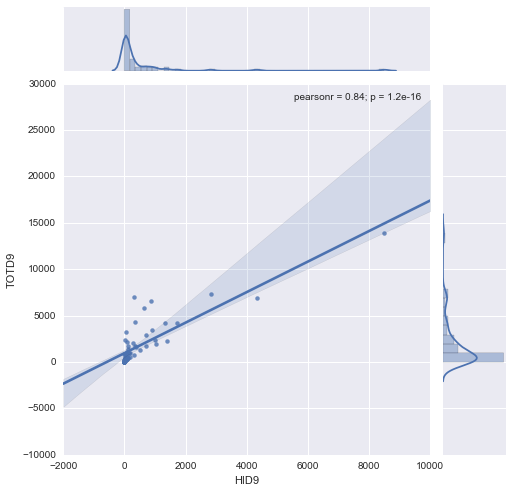

In [81]:
sns.jointplot(x="HID9",y="TOTD9",kind = "reg", data=state, size=7)



/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


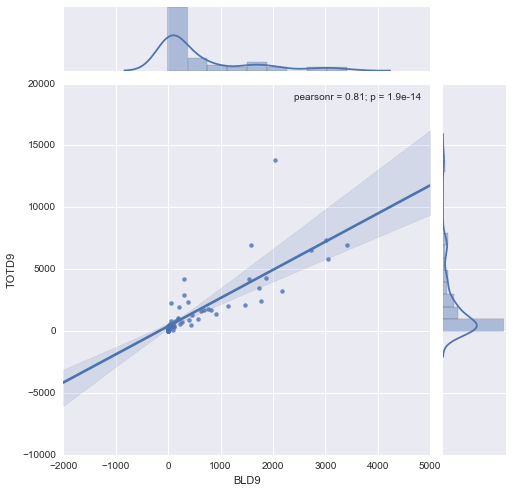

In [82]:

sns.jointplot(x="BLD9",y="TOTD9",kind = "reg", data=state, size=7)

/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


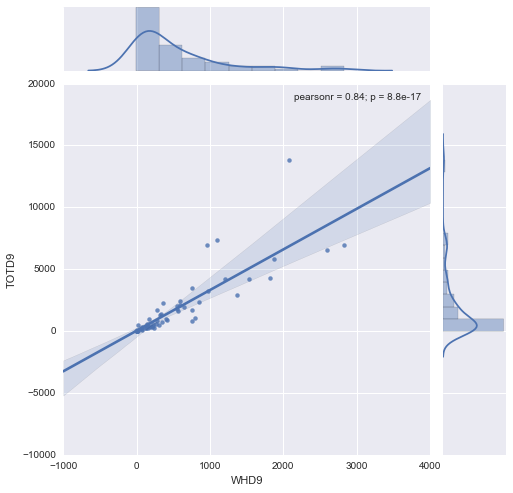

In [83]:
sns.jointplot(x="WHD9",y="TOTD9",kind = "reg", data=state, size=7)


/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


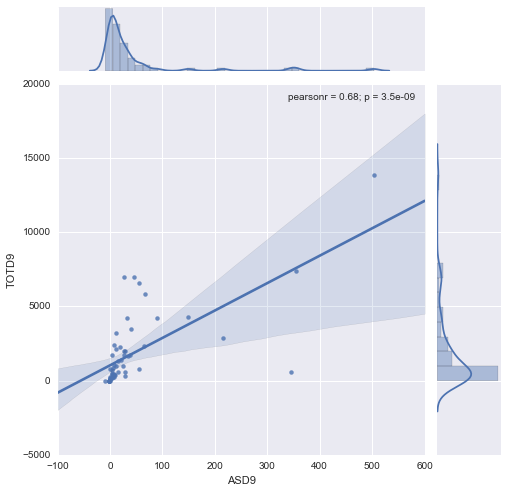

In [84]:
 

sns.jointplot(x="ASD9",y="TOTD9",kind = "reg", data=state, size=7)

# STEP DOWN METHOD DROPPING COLS ON BASIS OF P VALUES
# TOTAL WE HAVE 35 COLS 

## Lets try our module. we will first drop cols on basis of P values. 
* P values are higher then we will delete that column first and will see the R2 and P values for another cols.

In [85]:
import statsmodels.formula.api as smf
lm = smf.ols(formula= "TOTD9~ASD9+HID9+BLD9+WHD9+HPD9+TRD9+TOTDASM+TOTDASF+TOTDAS+TOTDHIM+TOTDHIF+TOTDHI+TOTDBLM+TOTDBLF+TOTDBLF+TOTDBL+TOTDWHM+TOTDWHF+TOTDWH+TOTDHPM+TOTDHPF+TOTDHP+TOTDTRM+TOTDTRF+TOTDTR+TOTDM+TOTDF+G9+EBS912+EBSAS+EBSHI+EBSBL+EBSWH+EBSHP+EBSTR", data=new_data2).fit()
lm.params

Intercept   -24.5430
ASD9          0.4927
HID9          1.3072
BLD9          1.0061
WHD9          1.0208
HPD9         -3.8752
TRD9         -2.0178
TOTDASM      -2.0865
TOTDASF      -0.6388
TOTDAS        1.2442
TOTDHIM       0.0648
TOTDHIF       0.6198
TOTDHI       -0.6123
TOTDBLM      -0.8755
TOTDBLF       0.0451
TOTDBL        0.2372
TOTDWHM      -0.1503
TOTDWHF       0.6599
TOTDWH       -0.4234
TOTDHPM      -9.4622
TOTDHPF      -2.7779
TOTDHP        6.1201
TOTDTRM       3.8091
TOTDTRF      -2.0448
TOTDTR       -0.8259
TOTDM         0.5368
TOTDF        -0.1554
G9            0.0039
EBS912       -0.0018
EBSAS         0.0044
EBSHI         0.0007
EBSBL         0.0005
EBSWH         0.0007
EBSHP         0.0076
EBSTR         0.0066
dtype: float64

In [86]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOTD9   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           1.05e-41
Time:                        13:38:32   Log-Likelihood:                -256.03
No. Observations:                  58   AIC:                             582.1
Df Residuals:                      23   BIC:                             654.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -24.5430     17.430     -1.408      0.1

## We will drop below cols which has P value in between 0.9 and 0.8
 * All cols P values = in between 0.8 and 0.9
* TOTDASF
* TOTDHIM
* TOTDHPF
* TOTDBLF
* TOTDBL
* TOTDWH
* TOTDWHM
* TOTDWHF
* TOTDTR
* EBSHP


In [87]:
lm = smf.ols(formula= "TOTD9~ASD9+HID9+BLD9+WHD9+HPD9+TRD9+TOTDASM+TOTDAS+TOTDHIF+TOTDHI+TOTDBLM+TOTDBLF+TOTDHPM+TOTDHP+TOTDTRM+TOTDTRF+TOTDM+TOTDF+G9+EBS912+EBSAS+EBSHI+EBSBL+EBSWH+EBSTR", data=new_data2).fit()
lm.params

Intercept   -12.1449
ASD9         -0.3313
HID9          1.3977
BLD9          1.0164
WHD9          0.9602
HPD9         -6.4248
TRD9         -1.6551
TOTDASM      -0.9144
TOTDAS        0.7462
TOTDHIF      -0.1291
TOTDHI       -0.0634
TOTDBLM       0.0263
TOTDBLF      -0.1490
TOTDHPM       6.0087
TOTDHP       -2.6284
TOTDTRM       4.7221
TOTDTRF      -4.7991
TOTDM        -0.0631
TOTDF         0.1788
G9           -0.0009
EBS912        0.0047
EBSAS        -0.0052
EBSHI        -0.0045
EBSBL        -0.0044
EBSWH        -0.0050
EBSTR        -0.0007
dtype: float64

# Our Adj R2 is 100 Percent. 

In [88]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOTD9   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9115.
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           4.56e-55
Time:                        13:38:32   Log-Likelihood:                -279.12
No. Observations:                  58   AIC:                             610.2
Df Residuals:                      32   BIC:                             663.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -12.1449     15.180     -0.800      0.4

# Lets continue procedure untill we get minmum MSE
* Dropping below listed cols(High P values >0.05)
* ASD9
* HPD9
* TOTDHIF
* TOTDHI
* TOTDBLM
* TOTDHPM
* TOTDHP 
* G9
* EBSTR

In [89]:
# Lets continue procedure and till we get optimum solution

lm = smf.ols(formula= "TOTD9~HID9+BLD9+WHD9+TRD9+TOTDASM+TOTDAS+TOTDBLF+TOTDTRM+TOTDTRF+TOTDM+TOTDF+EBS912+EBSAS+EBSHI+EBSBL+EBSWH", data=new_data2).fit()
lm.params

Intercept    12.5815
HID9          1.1336
BLD9          1.0050
WHD9          1.1123
TRD9         -0.8933
TOTDASM      -0.1037
TOTDAS        0.3096
TOTDBLF      -0.0219
TOTDTRM       0.8655
TOTDTRF      -0.7036
TOTDM        -0.0506
TOTDF         0.0681
EBS912        0.0072
EBSAS        -0.0103
EBSHI        -0.0081
EBSBL        -0.0070
EBSWH        -0.0075
dtype: float64

In [90]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOTD9   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6336.
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           2.80e-64
Time:                        13:38:32   Log-Likelihood:                -309.79
No. Observations:                  58   AIC:                             653.6
Df Residuals:                      41   BIC:                             688.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.5815     13.455      0.935      0.3

# Dropping below cols. high P values >0.05
* TRD9
* TOTDASM
* TOTDAS
* TOTDBLF
* TOTDTRM
* TOTDTRF



In [91]:
## Lets continue our procedure 
lm = smf.ols(formula= "TOTD9~HID9+BLD9+WHD9+TOTDM+TOTDF+EBS912+EBSAS+EBSHI+EBSBL+EBSWH", data=new_data2).fit()
lm.params

Intercept    29.3076
HID9          1.1094
BLD9          0.9616
WHD9          1.1339
TOTDM        -0.0699
TOTDF         0.1044
EBS912        0.0065
EBSAS        -0.0021
EBSHI        -0.0078
EBSBL        -0.0064
EBSWH        -0.0070
dtype: float64

In [92]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOTD9   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8201.
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           1.23e-72
Time:                        13:38:32   Log-Likelihood:                -319.90
No. Observations:                  58   AIC:                             661.8
Df Residuals:                      47   BIC:                             684.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     29.3076     13.427      2.183      0.0

In [93]:
## Lets drop column EBSAS = 0.2 P value
lm = smf.ols(formula= "TOTD9~HID9+BLD9+WHD9+TOTDM+TOTDF+EBS912+EBSHI+EBSBL+EBSWH", data=new_data2).fit()
lm.params

Intercept    30.6331
HID9          1.1010
BLD9          0.9536
WHD9          1.1478
TOTDM        -0.0704
TOTDF         0.1053
EBS912        0.0051
EBSHI        -0.0064
EBSBL        -0.0050
EBSWH        -0.0056
dtype: float64

# column which we are going to consider.
HID 9-Dropouts, Hispanic, Grade 9
* A unit increase in HID 9-Dropouts, Hispanic, Grade 9 is associated with a 1.10-unit Increase in total dropout rate for 9th grade.

BLD-9 Dropout Rate 
* A unit increase in BLD9-Dropouts, Black, Grade 9 is associated with a 0.95-unit Increase in total dropout rate for 9th grade.

WHD9-Dropouts, White, Grade 9

* A unit increase in WHD9-Dropouts, White, Grade 9 is associated with a 1.14-unit Increase in total dropout rate for 9th grade.

TOTDM-Dropouts, Grades 9-12, Male
* A unit increase in TOTDM-Dropouts, Grades 9-12, Male is associated with a 0.07-unit Decrease in total dropout rate for 9th grade.

TOTDF-Dropouts, Grades 9-12, Female
* A unit increase in TOTDF-Dropouts, Grades 9-12, Female is associated with a 0.1053-unit Increase in total dropout rate for 9th grade.

EBS912-Dropout Enrollment Base, Grades 9-12
* A unit increase in EBS912-Dropout Enrollment Base, Grades 9-12  is associated with a 0.0051-unit Increase in total dropout rate for 9th grade.

EBSHI-Dropout Enrollment Base, Grades 9-12, Hispanic
* A unit increase in EBSHI-Dropout Enrollment Base, Grades 9-12, Hispanic is associated with a 0.0064-unit Decrease in total dropout rate for 9th grade.

EBSBL- Dropout Enrollment Base, Grades 9-12, Black
* A unit increase in EBSBL- Dropout Enrollment Base, Grades 9-12, Black is associated with a 0.0050-unit Decrease in total dropout rate for 9th grade.


EBSWH- Dropout Enrollment Base, Grades 9-12, White
* A unit increase in EBSWH- Dropout Enrollment Base, Grades 9-12, White is associated with a 0.0056-unit Decrease in total dropout rate for 9th grade.


In [94]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOTD9   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     9087.
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           2.19e-74
Time:                        13:38:32   Log-Likelihood:                -320.59
No. Observations:                  58   AIC:                             661.2
Df Residuals:                      48   BIC:                             681.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     30.6331     13.388      2.288      0.0

# R2 Coefficient of Determination R2
* R2 = Percent of Variation in y can be explained by all X
* we are considereing adjcent R2, because we are dealing with Multiple regression.
* In our case, 99.99 percent of variation in total drop out rate for grade 9 explained by all below X
* HID 9-Dropouts, Hispanic, Grade 9
* BLD9-Dropouts, Black, Grade 9
* WHD9-Dropouts, White, Grade 9
* TOTDM-Dropouts, Grades 9-12, Male
* TOTDF-Dropouts, Grades 9-12, Female
* EBS912-Dropout Enrollment Base, Grades 9-12
* EBSHI-Dropout Enrollment Base, Grades 9-12, Hispanic
* EBSBL- Dropout Enrollment Base, Grades 9-12, Black
* EBSWH- Dropout Enrollment Base, Grades 9-12, White




In [95]:
lm.mse_total

6423296.1754385969

In [96]:
 lm.pvalues

Intercept    2.6582e-02
HID9         4.7204e-32
BLD9         2.3452e-35
WHD9         3.1083e-35
TOTDM        4.7713e-04
TOTDF        2.6071e-04
EBS912       1.9778e-07
EBSHI        5.7210e-09
EBSBL        5.4869e-07
EBSWH        6.0333e-08
dtype: float64

In [97]:
lm.mse_resid

4474.3836765762244

In [98]:
# 121832904.50352915 > 6423296
lm.mse_total

6423296.1754385969

# Prediction for all 58 stats rows

In [99]:
 print(lm.predict())

[  8.89278867e+02   2.97615378e+02   4.10777744e+03   7.40581951e+02
   1.38830413e+04   2.09048524e+03   1.29684727e+03   5.85914345e+02
   5.33668816e+02   4.15890894e+03   5.77608319e+03   4.69637537e+02
   2.34888637e+02   3.44018476e+03   3.20951418e+02   3.71789776e+02
   4.56543299e+02   1.16438317e+03   3.29263610e+03   2.93315738e+02
   2.02227091e+03   2.41639655e+03   4.29864695e+03   3.08342830e+02
   2.41438532e+03   2.11042207e+03   2.73457284e+02   1.78868194e+02
   8.36552325e+02   5.16060576e+00   1.77194999e+03   2.05449012e+03
   7.32076555e+03   6.48442201e+03   5.05810121e+01   7.01529273e+03
   9.97165309e+02   5.17708324e+02   1.58928237e+03   6.02931719e+02
   1.74508928e+03   1.14965954e+02   1.31173646e+03   6.97766735e+03
   2.30227325e+02   1.08322028e+02   1.77559239e+03   2.79897095e+03
   9.24775942e+02   9.23008409e+02   1.82671428e+02   2.74077043e+01
   2.74077043e+01   2.74077043e+01   2.74077043e+01   2.74077043e+01
  -1.88978716e+02   1.49287332e+02

# We can see the Linear relationship in between Cols and dropout rate.


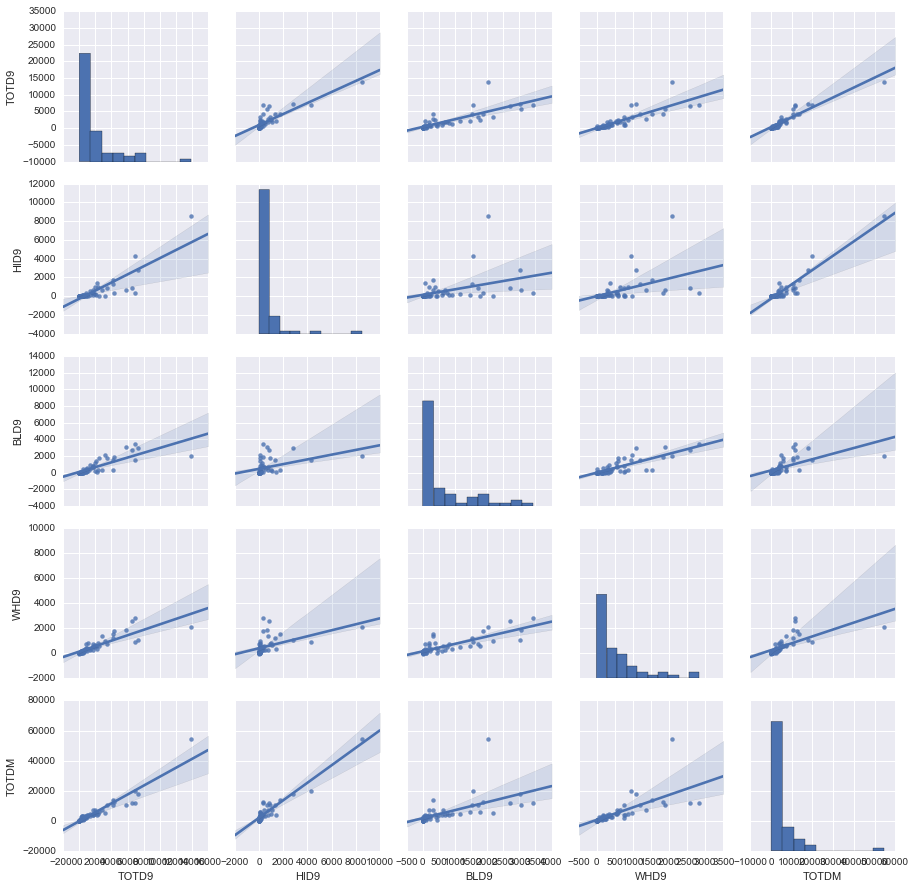

In [100]:
sns.pairplot(new_data2, vars=["TOTD9","HID9","BLD9","WHD9","TOTDM"],kind="reg")


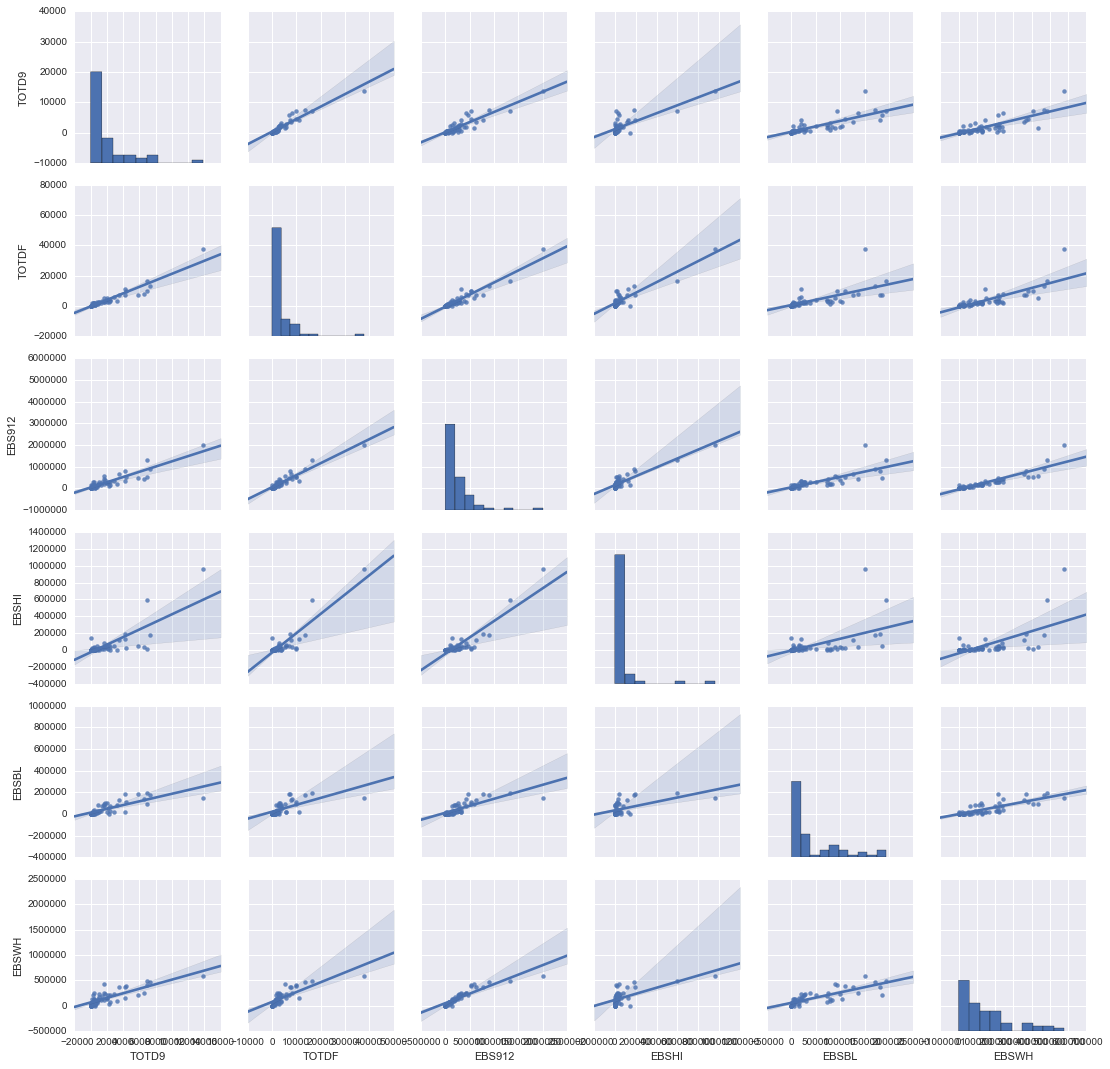

In [101]:
sns.pairplot(new_data2, vars=["TOTD9","TOTDF","EBS912","EBSHI","EBSBL","EBSWH"],kind="reg")

# Conclusion:
   # We are going to select above cols to predict the drop out rate.
   # we have compared all the columns P values and drop the Columns on basis of high P values(>0.05).
   # after dropping columns. I have compared MSE values so this module giving me the best result.
    

#lets see the relationship in another way.

Correlation Test R = 0.84 
Our correlation values is 0.84, i.e strong relationship between HID9 and TOTD9

F-Test-

P Value of f- Test: 4.7204e-32 <0.05

P value is less than 0.05

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship in between the feature and the response.

Hypothesis Test:

H0 = B1 = 0 Variation is unexplained.

H1= B1 not equal to 0 At least one x affect on total drop out rate for 9th grade.

If P value < 0.05 then Reject the Null hypothesis and claimed that there is relationship between at least one x variable and total drop out rate

4.7204e-32 <0.05 P value: In our case, we reject the Null hypothesis and claimed that there is relationship between at least one x and Total drop out rate.





/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


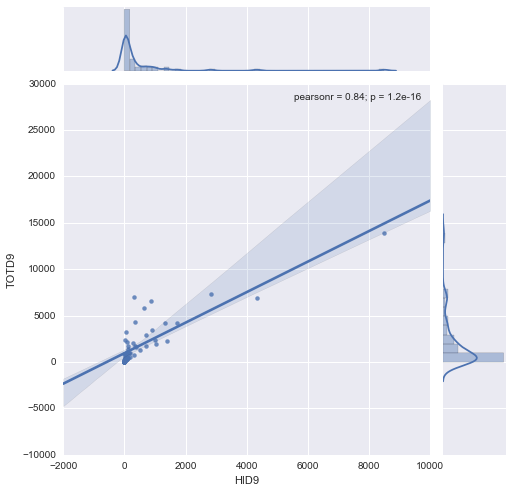

In [102]:
sns.jointplot(x="HID9",y="TOTD9",kind = "reg", data=new_data2, size=7)

#lets see the relationship in another way.

Correlation Test R = 0.81 
Our correlation values is 0.81, i.e strong relationship between BLD9 and TOTD9

F-Test- 

P Value of f- Test:  2.3452e-35 <0.05

P value is less than 0.05

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship in between the feature and the response.

Hypothesis Test:

H0 = B1 = 0 Variation is unexplained.

H1= B1 not equal to 0 At least one x affect on total drop out rate for 9th grade.

If P value < 0.05 then Reject the Null hypothesis and claimed that there is relationship between at least one x variable and total drop out rate
2.3452e-35 <0.05 P value: In our case, we reject the Null hypothesis and claimed that there is relationship between at least one x and Total drop out rate.

/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


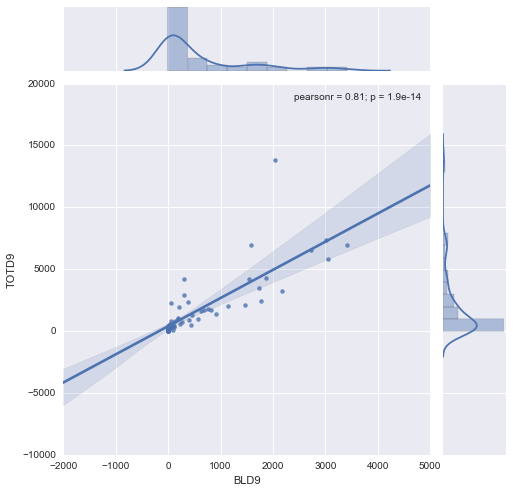

In [103]:
sns.jointplot(x="BLD9",y="TOTD9",kind = "reg", data=new_data2, size=7)

#lets see the relationship in another way.

Correlation Test R = 0.84 
Our correlation values is 0.84, i.e strong relationship between WHD9 and TOTD9

F-Test-

P Value of f- Test: 0.000000 <0.05

P value is less than 0.05

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship in between the feature and the response.

Hypothesis Test:

H0 = B1 = 0 Variation is unexplained.

H1= B1 not equal to 0 At least one x affect on total drop out rate for 9th grade.

If P value < 0.05 then Reject the Null hypothesis and claimed that there is relationship between at least one x variable and total drop out rate
0.000 <0.05 P value: In our case, we reject the Null hypothesis and claimed that there is relationship between at least one x and Total drop out rate.





/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


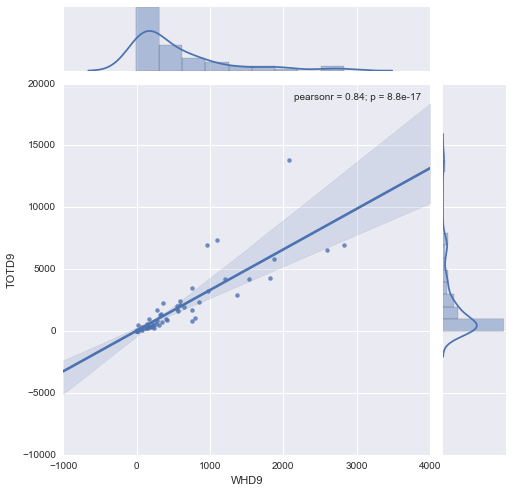

In [104]:
sns.jointplot(x="WHD9",y="TOTD9",kind = "reg", data=new_data2, size=7)

#lets see the relationship in another way.

Correlation Test R = 0.94 
Our correlation values is 0.94, i.e strong relationship between TOTDM and TOTD9

F-Test-

P Value of f- Test: 0.000000 <0.05

P value is less than 0.05

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship in between the feature and the response.

Hypothesis Test:

H0 = B1 = 0 Variation is unexplained.

H1= B1 not equal to 0 At least one x affect on total drop out rate for 9th grade.

If P value < 0.05 then Reject the Null hypothesis and claimed that there is relationship between at least one x variable and total drop out rate
0.00000 <0.05 P value: In our case, we reject the Null hypothesis and claimed that there is relationship between at least one x and Total drop out rate.





/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


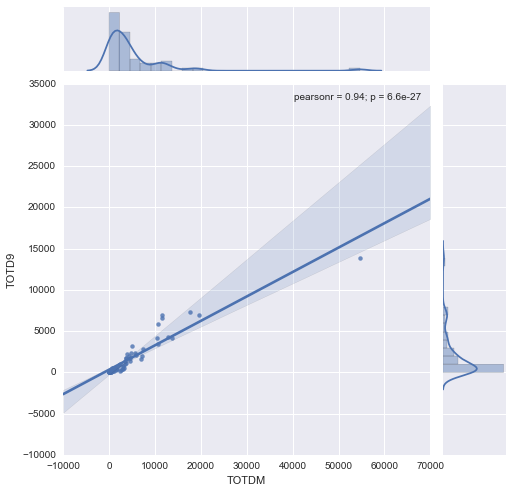

In [105]:
sns.jointplot(x="TOTDM",y="TOTD9",kind = "reg", data=new_data2, size=7)

#lets see the relationship in another way.

Correlation Test R = 0.94 
Our correlation values is 0.94, i.e strong relationship between TOTDF and TOTD9

F-Test-

P Value of f- Test: 0.000000 <0.05

P value is less than 0.05

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship in between the feature and the response.

Hypothesis Test:

H0 = B1 = 0 Variation is unexplained.

H1= B1 not equal to 0 At least one x affect on total drop out rate for 9th grade.

If P value < 0.05 then Reject the Null hypothesis and claimed that there is relationship between at least one x variable and total drop out rate
0.000 <0.05 P value: In our case, we reject the Null hypothesis and claimed that there is relationship between at least one x and Total drop out rate.





/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


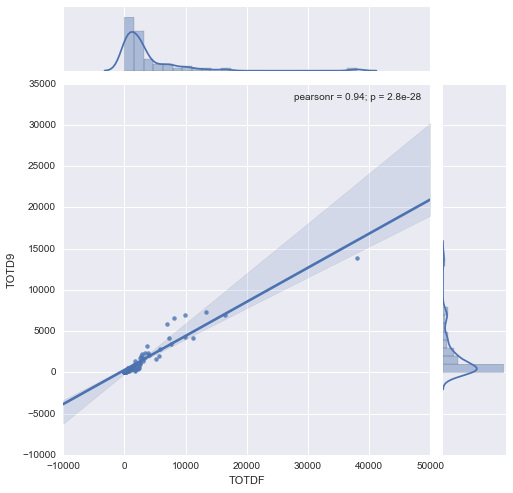

In [106]:
sns.jointplot(x="TOTDF",y="TOTD9",kind = "reg", data=new_data2, size=7)

#lets see the relationship in another way.

Correlation Test R = 0.9 
Our correlation values is 0.9, i.e strong relationship between EBS912 and TOTD9

F-Test-

P Value of f- Test: 0.000000 <0.05

P value is less than 0.05

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship in between the feature and the response.

Hypothesis Test:

H0 = B1 = 0 Variation is unexplained.

H1= B1 not equal to 0 At least one x affect on total drop out rate for 9th grade.

If P value < 0.05 then Reject the Null hypothesis and claimed that there is relationship between at least one x variable and total drop out rate
0.000 <0.05 P value: In our case, we reject the Null hypothesis and claimed that there is relationship between at least one x and Total drop out rate.





/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


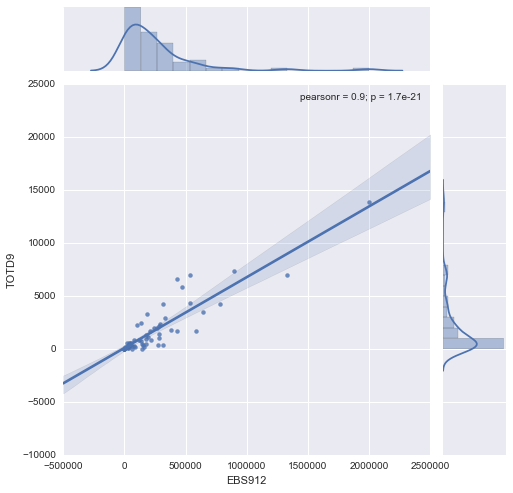

In [107]:
sns.jointplot(x="EBS912",y="TOTD9",kind = "reg", data=new_data2, size=7)

#lets see the relationship in another way.

Correlation Test R = 0.77
Our correlation values is 0.77, i.e strong relationship between EBSHI and TOTD9

F-Test-

P Value of f- Test: 0.000000 <0.05

P value is less than 0.05

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship in between the feature and the response.

Hypothesis Test:

H0 = B1 = 0 Variation is unexplained.

H1= B1 not equal to 0 At least one x affect on total drop out rate for 9th grade.

If P value < 0.05 then Reject the Null hypothesis and claimed that there is relationship between at least one x variable and total drop out rate
0.000 <0.05 P value: In our case, we reject the Null hypothesis and claimed that there is relationship between at least one x and Total drop out rate.





/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


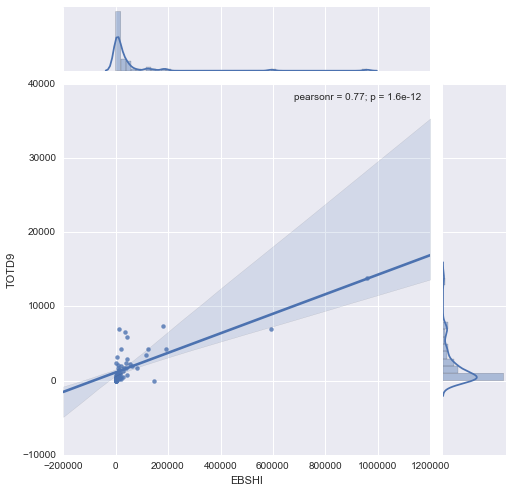

In [108]:
sns.jointplot(x="EBSHI",y="TOTD9",kind = "reg", data=new_data2, size=7)

#lets see the relationship in another way.

Correlation Test R = 0.79
Our correlation values is 0.79, i.e strong relationship between EBSBL and TOTD9

F-Test-

P Value of f- Test: 0.000000 <0.05

P value is less than 0.05

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship in between the feature and the response.

Hypothesis Test:

H0 = B1 = 0 Variation is unexplained.

H1= B1 not equal to 0 At least one x affect on total drop out rate for 9th grade.

If P value < 0.05 then Reject the Null hypothesis and claimed that there is relationship between at least one x variable and total drop out rate
0.000 <0.05 P value: In our case, we reject the Null hypothesis and claimed that there is relationship between at least one x and Total drop out rate.





/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


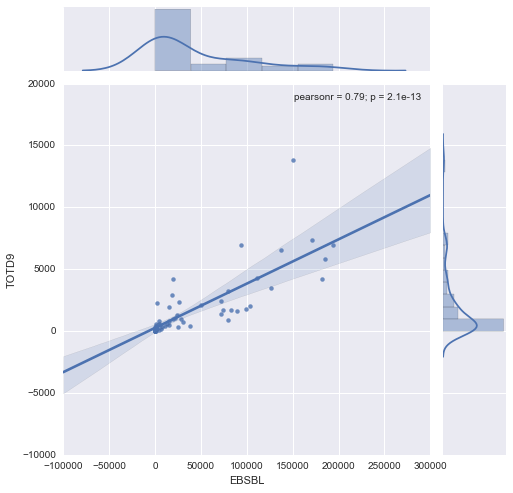

In [109]:
sns.jointplot(x="EBSBL",y="TOTD9",kind = "reg", data=new_data2, size=7)

#lets see the relationship in another way.

Correlation Test R = 0.8
Our correlation values is 0.80, i.e strong relationship between EBSWH and TOTD9

F-Test-

P Value of f- Test: 0.000000 <0.05

P value is less than 0.05

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship in between the feature and the response.

Hypothesis Test:

H0 = B1 = 0 Variation is unexplained.

H1= B1 not equal to 0 At least one x affect on total drop out rate for 9th grade.

If P value < 0.05 then Reject the Null hypothesis and claimed that there is relationship between at least one x variable and total drop out rate
0.000 <0.05 P value: In our case, we reject the Null hypothesis and claimed that there is relationship between at least one x and Total drop out rate.





/Users/Aniket/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


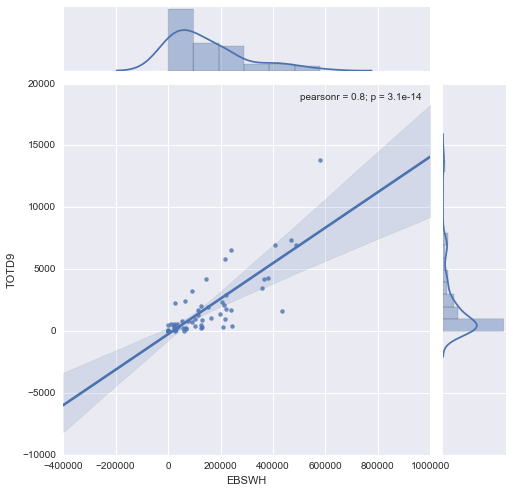

In [110]:
sns.jointplot(x="EBSWH",y="TOTD9",kind = "reg", data=new_data2, size=7)

# Analysis on output 

In [111]:
## statename and predicted output file.
##Lets do some analysis on predicted output.
output = pd.read_csv("State_dropout.csv")
output.head()

,Statename,DroputRate
0,Alabama,889.2789
1,Alaska,297.6154
2,Arizona,4107.7774
3,Arkansas,740.5820
4,California,13883.0413


In [112]:
output.describe()

,DroputRate
count,58.0000
mean,1808.0000
std,2533.6788
min,-188.9787
25%,244.5308
50%,862.9156
75%,2105.4379
max,13883.0413


In [113]:
output["DroputRate"].max()

13883.041300000001

In [114]:
output["DroputRate"].min()

-188.97871599999999

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

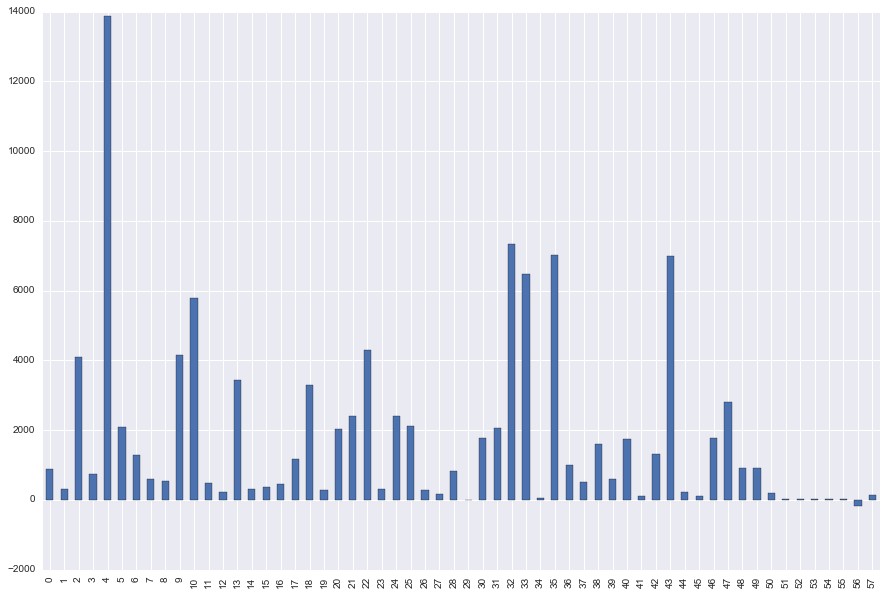

In [115]:
output["DroputRate"].plot(kind="bar", figsize=(15,10))
plt.xticks(rotation="vertical")

* You can see the Visual pattern in drop out rate 4th state have Maximum Drop out rate and last 4-5 cols have less Number of drop out rate.